In [1]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
from scipy import stats
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
import analysis_utilities as au
import helper_functions as hf
import matplotlib.transforms as transforms

# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)


c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
plt.rcParams["font.family"] = "DejaVu Sans"
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data

In [3]:

# if "group" not in locals():
#     group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials", movement_metric_type='velocity')
# else:
#     if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
#         group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")

# if "group2" not in locals():
#     group2 = rdf.generate_subject_object_v3("Exp2", "All Trials", movement_metric_type='velocity')
# else:
#     if group2.exp_info.experiment != "Exp2":  # This means i changed experiment and need to run again
#         group2 = rdf.generate_subject_object_v3("Exp2", "All Trials")

with open(constants.MODEL_INPUT_PATH / 'bootstrap_parameter_distribution.pkl','rb') as f:
    parameter_distribution = dill.load(f)    
#* Comparison Targets load
with open(constants.MODEL_INPUT_PATH / 'participant_mean_movement_onset_time.pkl','rb') as f:
    participant_mean_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_median_movement_onset_time.pkl','rb') as f:
    participant_median_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_sd_movement_onset_time.pkl','rb') as f:
    participant_sd_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_iqr_movement_onset_time.pkl','rb') as f:
    participant_iqr_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_wins.pkl','rb') as f:
    participant_wins = dill.load(f)  
participant_perc_wins = (participant_wins/it.num_trials)*100
with open(constants.MODEL_INPUT_PATH / 'participant_incorrects.pkl','rb') as f:
    participant_incorrects = dill.load(f)  
participant_perc_incorrects = (participant_incorrects/it.num_trials)*100

with open(constants.MODEL_INPUT_PATH / 'participant_indecisions.pkl','rb') as f:
    participant_indecisions = dill.load(f)  
participant_perc_indecisions = (participant_indecisions/it.num_trials)*100

with open(r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\participant_data\Exp1_stats_df.pkl', "rb") as f:
    stats_df = dill.load(f)
    
with open(DATA_PATH / "participant_data" / 'Exp1_trial_data_df.pkl', "rb") as f:
    trial_df = dill.load(f)
with open(DATA_PATH / "participant_data" / 'Exp1_summary_data_df.pkl', "rb") as f:
    summary_df = dill.load(f)
    

In [4]:
summary_df

,Subject,Condition,Factor_1,Factor_2,Mean_Movement_Onset_Time,Median_Movement_Onset_Time,Median_Movement_Time,Wins,Indecisions,Incorrects,Correct_Decisions,Wins_When_Both_Decide,Median_Gamble_Movement_Onset_Time,SD_Movement_Onset_Time,IQR_Movement_Onset_Time,Q1_Movement_Onset_Time,Q3_Movement_onset_time,Reaction_Decisions,Guess_Decisions,Points
0,1,1,1000,50,1135.1625,1149.5,183.0,58.75,3.75,37.50,48.75,61.038961,1259.0,92.573814,124.25,1071.75,1196.00,26.25,73.75,0.0
1,1,2,1000,150,1154.1875,1166.5,202.0,70.00,17.50,12.50,60.00,84.615385,1188.5,101.211547,155.50,1063.50,1219.00,42.50,57.50,0.0
2,1,3,1100,50,1181.1750,1215.0,195.0,53.75,16.25,30.00,63.75,64.179104,1315.0,154.859838,190.25,1099.25,1289.50,33.75,66.25,0.0
3,1,4,1100,150,1115.7500,1120.0,188.0,53.75,5.00,41.25,51.25,53.521127,1129.0,122.806199,127.00,1057.25,1184.25,12.50,87.50,0.0
4,1,5,1200,50,1097.0500,1112.5,194.0,42.50,3.75,53.75,45.00,44.155844,NaN,135.230997,174.25,1017.75,1192.00,0.00,100.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20,2,1000,150,901.0750,912.5,277.0,50.00,8.75,41.25,51.25,54.166667,1115.0,206.828841,244.25,796.75,1041.00,11.25,88.75,0.0
116,20,3,1100,50,1039.2750,1033.5,255.0,47.50,13.75,38.75,56.25,55.072464,1298.0,159.593623,234.50,920.50,1155.00,11.25,88.75,0.0
117,20,4,1100,150,1013.6750,1002.5,253.5,51.25,13.75,35.00,55.00,58.823529,1210.0,189.881132,265.00,903.75,1168.75,17.50,82.50,0.0
118,20,5,1200,50,994.2000,1001.0,268.5,43.75,8.75,47.50,48.75,47.945205,1419.5,182.333856,252.50,842.25,1094.75,2.50,97.50,0.0


# Stats

In [5]:
#* Get dataframe and create the stats inputs
# TODO LOAD IN THE DATAFRAME FROM The new df I just created

exp1_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_stats_df.pkl") 
exp1_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_anova_df.pkl") 
exp1_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_df.pkl") 
exp1_pvals_uncorrected_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_uncorrected_df.pkl") 
exp1_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_cles_df.pkl") 

exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.024174,0.0,0.027363
1,Reaction_Time_Mean,NaN,0.0,0.004936,0.0,0.354558
2,Reaction_Time_SD,NaN,0.0,0.000011,0.0,0.000000
3,Reaction_Time_IQR,NaN,0.0,0.000015,0.0,0.000002


0 = Early Mean Low Variance 

2 = Middle Mean Low Variance

4 = Late Mean Low Variance

1 = Early Mean High Variance

3 = Middle Mean High Variance

5 = Late Mean High Variance

In [6]:
exp1_cles_df

,Metric,Collapsed,01,12,02,04,13,15,24,35
0,Mean_Movement_Onset_Time,means,72.5,62.50,60.0,NaN,NaN,NaN,NaN,NaN
1,Median_Movement_Onset_Time,means,72.5,62.50,57.5,NaN,NaN,NaN,NaN,NaN
2,SD_Movement_Onset_Time,means,52.5,70.00,77.5,NaN,NaN,NaN,NaN,NaN
3,IQR_Movement_Onset_Time,NaN,NaN,NaN,85.0,90.0,65.0,55.0,85.0,60.0
4,Wins,NaN,NaN,NaN,100.0,95.0,85.0,90.0,87.5,55.0
5,Incorrects,NaN,NaN,NaN,85.0,92.5,75.0,90.0,77.5,70.0
6,Indecisions,NaN,NaN,NaN,85.0,80.0,62.5,57.5,60.0,65.0
7,Guess_Decisions,means,85.0,96.25,95.0,NaN,NaN,NaN,NaN,NaN


In [7]:
exp1_pvals_df

,Metric,Collapsed,01,12,02,04,13,15,24,35
0,Mean_Movement_Onset_Time,means,0.028485,0.019854,0.693770,NaN,NaN,NaN,NaN,NaN
1,Median_Movement_Onset_Time,means,0.014048,0.018102,0.717679,NaN,NaN,NaN,NaN,NaN
2,SD_Movement_Onset_Time,means,0.356407,0.039314,0.000030,NaN,NaN,NaN,NaN,NaN
3,IQR_Movement_Onset_Time,NaN,NaN,NaN,2.252688,0.000144,0.755955,1.507928,0.043355,2.241672
4,Wins,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000280,0.116623
5,Incorrects,NaN,NaN,NaN,0.099888,0.000000,0.027534,0.000000,0.000000,0.019750
6,Indecisions,NaN,NaN,NaN,0.000228,0.003975,0.133548,1.023060,0.733296,0.591063
7,Guess_Decisions,means,0.000077,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
exp1_anova_df

,Metric,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Mean_Movement_Onset_Time,Factor_1,53736.235826,2,38,26868.117913,3.995206,2.662010e-02,4.025930e-02,0.028067,0.746978
1,Mean_Movement_Onset_Time,Factor_2,51589.454337,1,19,51589.454337,6.563168,1.907245e-02,1.907245e-02,0.026976,1.000000
2,Mean_Movement_Onset_Time,Factor_1 * Factor_2,4279.493972,2,38,2139.746986,0.773878,4.683531e-01,4.498238e-01,0.002295,0.847179
0,Median_Movement_Onset_Time,Factor_1,59699.487500,2,38,29849.743750,4.360600,1.972979e-02,3.007528e-02,0.031095,0.775649
1,Median_Movement_Onset_Time,Factor_2,66811.602083,1,19,66811.602083,6.815716,1.718830e-02,1.718830e-02,0.034671,1.000000
2,Median_Movement_Onset_Time,Factor_1 * Factor_2,2723.429167,2,38,1361.714583,0.521157,5.980163e-01,5.652153e-01,0.001462,0.828255
0,SD_Movement_Onset_Time,Factor_1,15203.650706,2,38,7601.825353,5.501936,7.970963e-03,1.801482e-02,0.041648,0.691673
1,SD_Movement_Onset_Time,Factor_2,10047.983589,1,19,10047.983589,20.361034,2.384257e-04,2.384257e-04,0.027919,1.000000
2,SD_Movement_Onset_Time,Factor_1 * Factor_2,3851.588749,2,38,1925.794374,2.485900,9.669434e-02,9.740084e-02,0.010889,0.988805
0,IQR_Movement_Onset_Time,Factor_1,18288.150000,2,38,9144.075000,3.834905,3.040418e-02,5.494341e-02,0.030361,0.612314


Greenhouse Geiser ddof and F

In [9]:
exp1_anova_df["gg_ddof1"] = exp1_anova_df["eps"]*exp1_anova_df["ddof1"]
exp1_anova_df["gg_ddof2"] = exp1_anova_df["eps"]*exp1_anova_df["ddof2"]
exp1_anova_df

,Metric,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps,gg_ddof1,gg_ddof2
0,Mean_Movement_Onset_Time,Factor_1,53736.235826,2,38,26868.117913,3.995206,2.662010e-02,4.025930e-02,0.028067,0.746978,1.493956,28.385172
1,Mean_Movement_Onset_Time,Factor_2,51589.454337,1,19,51589.454337,6.563168,1.907245e-02,1.907245e-02,0.026976,1.000000,1.000000,19.000000
2,Mean_Movement_Onset_Time,Factor_1 * Factor_2,4279.493972,2,38,2139.746986,0.773878,4.683531e-01,4.498238e-01,0.002295,0.847179,1.694358,32.192805
0,Median_Movement_Onset_Time,Factor_1,59699.487500,2,38,29849.743750,4.360600,1.972979e-02,3.007528e-02,0.031095,0.775649,1.551298,29.474661
1,Median_Movement_Onset_Time,Factor_2,66811.602083,1,19,66811.602083,6.815716,1.718830e-02,1.718830e-02,0.034671,1.000000,1.000000,19.000000
2,Median_Movement_Onset_Time,Factor_1 * Factor_2,2723.429167,2,38,1361.714583,0.521157,5.980163e-01,5.652153e-01,0.001462,0.828255,1.656510,31.473693
0,SD_Movement_Onset_Time,Factor_1,15203.650706,2,38,7601.825353,5.501936,7.970963e-03,1.801482e-02,0.041648,0.691673,1.383347,26.283586
1,SD_Movement_Onset_Time,Factor_2,10047.983589,1,19,10047.983589,20.361034,2.384257e-04,2.384257e-04,0.027919,1.000000,1.000000,19.000000
2,SD_Movement_Onset_Time,Factor_1 * Factor_2,3851.588749,2,38,1925.794374,2.485900,9.669434e-02,9.740084e-02,0.010889,0.988805,1.977610,37.574583
0,IQR_Movement_Onset_Time,Factor_1,18288.150000,2,38,9144.075000,3.834905,3.040418e-02,5.494341e-02,0.030361,0.612314,1.224629,23.267949


# General Figures

## Experimental Design w/ 700ms trial onset

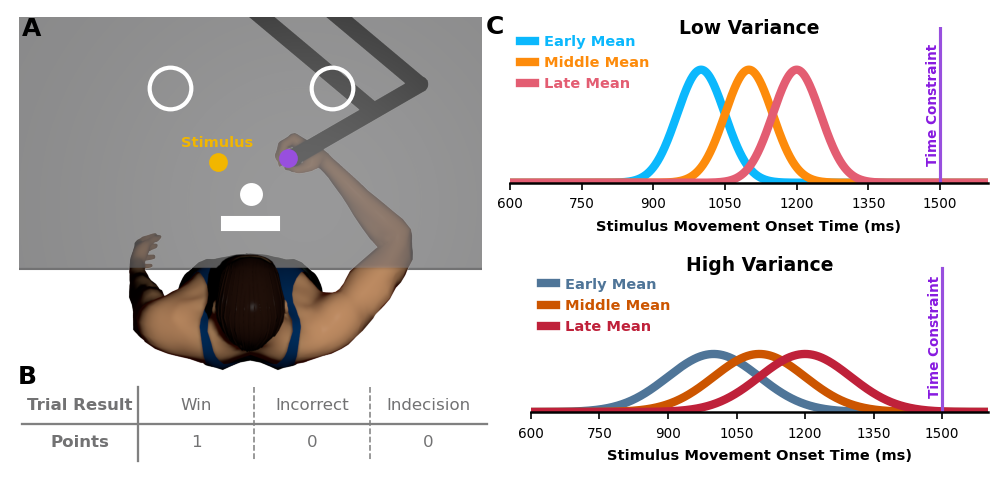

In [10]:
#
#* Set distribution values
if True:
    timesteps = np.arange(0,2000,1)
    mu1,mu2,mu3 = 1000,1100,1200
    sd1,sd2 = 50,100

    dist1 = stats.norm.pdf(timesteps,mu1,sd1) 
    dist2 = stats.norm.pdf(timesteps,mu2,sd1) 
    dist3 = stats.norm.pdf(timesteps,mu3,sd1) 
    dist4 = stats.norm.pdf(timesteps,mu1,sd2) 
    dist5 = stats.norm.pdf(timesteps,mu2,sd2) 
    dist6 = stats.norm.pdf(timesteps,mu3,sd2)
    dists1 = [dist1, dist2, dist3]
    dists2 = [dist4, dist5, dist6]
    alldists = [dists1,dists2]

#* Create Figure
fig = pf.NewFigure('ab;ab;ad;cd', figsize=(6.5,3), hspace=0,wspace=0)
start_radius = 0.2
xrad = start_radius/6.5
yrad = start_radius/3
#* Kinarm Guy, circles, stimulus, player
fig.axes['a'].imshow(mpimg.imread(SAVE_PATH / "kinarm_guy_clean.png"), aspect='equal')
rectw = 0.125
fig.axes['a'].add_patch(mpl.patches.Rectangle((0,0.29), width=1, height=1-0.29, color=wheel.dark_grey, zorder=-1,transform=fig.axes['a'].transAxes))
fig.axes['a'].add_patch(mpl.patches.Rectangle((0.5-rectw/2,0.4), width=rectw, height=0.035, color=wheel.white, zorder=99, transform=fig.axes['a'].transAxes))
fig.axes['a'].plot(0.5,0.5,"wo", markersize=10, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(0.325,0.8,"wo",markerfacecolor="none", markersize=20,mew=2, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(0.675,0.8,"wo",markerfacecolor="none", markersize=20,mew=2, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(1.82,2.05,"o", color=constants.player_color, markersize=8, transform = fig.axmain.transData)
fig.axes['a'].plot(1.35,2.02,"o", color=constants.stimulus_color, markersize=8, transform = fig.axmain.transData)
fig.axes['a'].text(1.35,2.1,"Stimulus",color=constants.stimulus_color, fontweight="bold", fontsize=7, transform=fig.axmain.transData,
                   ha='center',va='bottom')
#* Table
text = np.array([['Trial Result', 'Win', "Incorrect", 'Indecision'],
                 ['Points',       "1",       "0",         "0"]])
fontweights = np.full_like(text, ["light"])
fontweights[:,0] = "bold"
table = pf.PrettyTable(
    fig.axes['c'], 
    text,
    fontsize=8, fontweight=fontweights,
    inner_vertical_ls=['-',"--","--"],
    inner_horizontal_ls=["-"], 
    inner_horizontal_lw=1.1,
    inner_vertical_lw=[1.1,0.75,0.75],
    border_lw=0, 
    fontcolor=wheel.dark_grey,
)

#* Plot Distributions
ax1 = fig.axes['b']
ax2 = fig.axes['d']
colors = [constants.xticklabel_colors_means[:3], constants.xticklabel_colors_means[3:]] 
vline_y = [1,0.9]
text_y = [0.5,0.47]
for i,ax in enumerate([ax1,ax2]):
    for j in range(3):
        ax.plot(alldists[i][j],color=colors[i][j],lw=4)
    ax.axvline(1500, ymax=vline_y[i], color=wheel.purple)
    # the x coords of this transformation are data, and the y coord are axes
    trans = transforms.blended_transform_factory(
        ax.transData, ax.transAxes)
    ax.text(s="Time Constraint", x=1470, y=text_y[i], rotation=90, transform = trans, fontsize=6.5, va='center', fontweight="bold", color=wheel.plum)
    ax.set_xlim(600,1600)
    ax.set_xticks(np.arange(600,1601,150))
    ax.set_xticklabels(np.arange(600,1601,150),fontsize=6.5, c='black')
    # ax.set_title(titles[i])
    # ax.set_ylabel("Probability Density", fontsize=7, labelpad=-1)
    ax.spines['left'].set_visible(False)
    ax.set_yticklabels([])
    ax.tick_params(axis="y", which='both', length=0)
    ax.set_xlabel('Stimulus Movement Onset Time (ms)',fontsize = 7)
    ax.set_ylim(0,0.011)

#* Legends
if True:
    legend_labels1 = [
            "Early Mean",
            "Middle Mean",
            "Late Mean",
        ]
    legend_labels2 = [
        "Early Mean",
        "Middle Mean",
        "Late Mean",
    ]
    legend_labels = [legend_labels1, legend_labels2]
    legend_locs = [(0.01,0.55), (0.01, 0.45)]
    columnspacing = [1.6]*2 
    for i,ax in enumerate([ax1,ax2]):
        leg = dv.legend(ax,labels=legend_labels[i], colors=colors[i], ncols=1, loc=legend_locs[i],
        handlelength=1.0, columnspacing=columnspacing[i], lw=4, fontsize=7, fontweight='bold',
        handletextpad=0.6)
        leg.set_in_layout(False)
        
ax1.set_title("Low Variance", fontsize=9, y=0.875)
ax2.set_title("High Variance", fontsize=9, y=0.8)

#* Add letters and adjust sizes 
fig.fig.get_layout_engine().set(w_pad=1/72, 
                                h_pad=1 / 72, 
                                hspace=0,
                                wspace=0)
adjust = 0.75
fig.adjust_size(fig.axes['a'],(adjust,adjust+0.08))
fig.adjust_position(fig.axes['a'],(-adjust+0.2,-adjust+0.115))

fig.add_letter(fig.axes['a'], 
               x=0.006, y=1, 
               letter='A', zorder=101)
fig.add_letter(fig.axes['b'], x=-0.05, y=1.075, letter="C")
fig.adjust_position(fig.axes['b'], (-0.14 ,0))
fig.adjust_size(fig.axes['b'], (0.14,0))

fig.add_letter(fig.axes['c'], x=-0.01, y=1.3, letter="B")
fig.adjust_position(fig.axes['c'], (-0.175,-0.325))
fig.adjust_size(fig.axes['c'], (0.05,0.2))
fig.axes['c'].axis("off")
fig.axes['a'].axis('off')

# plt.show()
fig.savefig(SAVE_PATH / "exp1_experimental_design_v2.png")

## Response Time Experiment

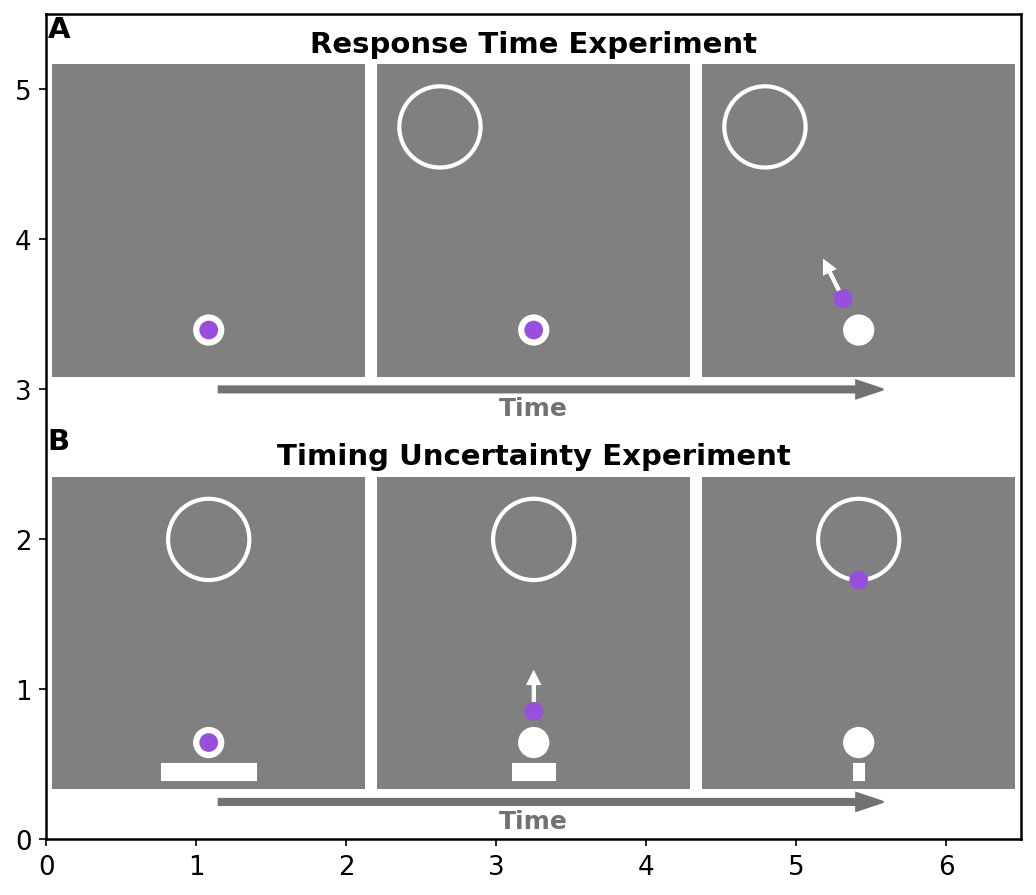

In [11]:
#* Create Shape Objects
squares = [(0,0,1,1)]*6
circle_radius = 0.13
circ_pad = 0.07
startx,starty = 0.5, 0.15
player_circle_positions =  [(startx,starty),
                            (startx,starty),
                            (startx-0.05,starty+0.1),
                            (startx,starty),
                            (startx,starty+0.1),
                            (startx,starty+0.52)]
rectangles = []
circle_patches = []
start_circles = []
player_circles = []
for i,square in enumerate(squares):
    rectangles.append(mpl.patches.Rectangle((square[0], square[1]), square[2], square[3], edgecolor='grey', facecolor='grey', lw=0,clip_on=False))
    circLx = square[0] + circle_radius + circ_pad
    circRx = square[0] + square[2] - circle_radius - circ_pad
    circy = square[1] + square[3] - circle_radius - circ_pad
    circL = mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circR = mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circle_patches.append((circL,circR))
    start_circles.append(mpl.patches.Circle((startx,starty), 0.05, edgecolor='white', facecolor='white', lw=0))
    player_circles.append(mpl.patches.Circle(player_circle_positions[i], 0.03, facecolor=constants.player_color, lw=0, zorder=10))

timing_bars = []
for i in range(3):
    timing_bars.append(mpl.patches.Rectangle([0.35+i/12,0.03], 0.3 - i/6, 0.05, color='white'))
    
#* Initialize Plot
mosaic = [["a","aa","aaa"],
          ["b","bb","bbb"],
          ]
fig = pf.NewFigure(mosaic, figsize=(6.5,5.5))
square_axes = [ax for k,ax in fig.axes.items() if k !='c' ]
#* Plot upper and lower squares and associated circles
for i,ax in enumerate(square_axes):
    ax.set_aspect('equal')
    ax.add_patch(rectangles[i])
    ax.add_patch(start_circles[i])
    ax.add_patch(player_circles[i])

    if i == 1 or i == 2:
        ax.add_patch(circle_patches[i][0])
        if i == 2:
            ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],-0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white, zorder=2)

    if i >= 3:
        ax.add_patch(mpl.patches.Circle(((circLx+circRx)/2,circy), circle_radius, edgecolor='white', facecolor='none', lw=2, zorder=4))
        ax.add_patch(timing_bars[i-3])
        
    if i == 4:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],0,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white, zorder=2)

    # ax.add_patch(circle_patches[i][1])

    
        
    ax.set_xlim(0,1) # need to do this because ax arrow fucks with the xlim and ylim
    ax.set_ylim(0,1)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.spines[['left', 'bottom']].set_visible(False)  

fig.axmain.text(0.5,1.02,"Response Time Experiment", fontsize=14,fontweight="bold", color=wheel.black,
                   transform=fig.axes['aa'].transAxes,ha='center',va='bottom' )
fig.axmain.text(0.5,1.02,"Timing Uncertainty Experiment", fontsize=14,fontweight="bold", color=wheel.black,
                        transform=fig.axes["bb"].transAxes,ha='center',va='bottom' )


#*####### Fine tuning and add time arrows ########
fig.fig.canvas.draw()
fig.fig.set_layout_engine('none')
if False:
    adj = 2
    fig.adjust_size(fig.axes['c'],(0,-adj))
    fig.adjust_position(fig.axes['c'],(0,adj/2))

    fig.adjust_position(fig.axes['a'], (0.1,0))
    fig.adjust_position(fig.axes['aa'], (0.1,0))
    fig.adjust_position(fig.axes['b'], (0.1,0))
    
#* Plot Time Arrows
for ypos in [3,0.25]:
    fig.axmain.text(3.25, ypos-0.13, "Time", ha='center',va='center', 
                    transform=fig.axmain.transData, fontweight="bold", color=wheel.dark_grey)
    fig.axmain.arrow(1.15, ypos, 4.25, 0, transform = fig.axmain.transData, color=wheel.dark_grey, width=0.04)

#* Legend
fig.add_letter(fig.axmain,0.0015,0.999, transform=fig.axmain.transAxes, fontsize=14)
fig.add_letter(fig.axmain, 0.0015, 0.499, transform = fig.axmain.transAxes, fontsize=14)
# fig.remove_figure_borders()
plt.show()
fig.savefig(SAVE_PATH / "exp1_reaction_and_timing_experimental_design.png")

## Response Time Separated

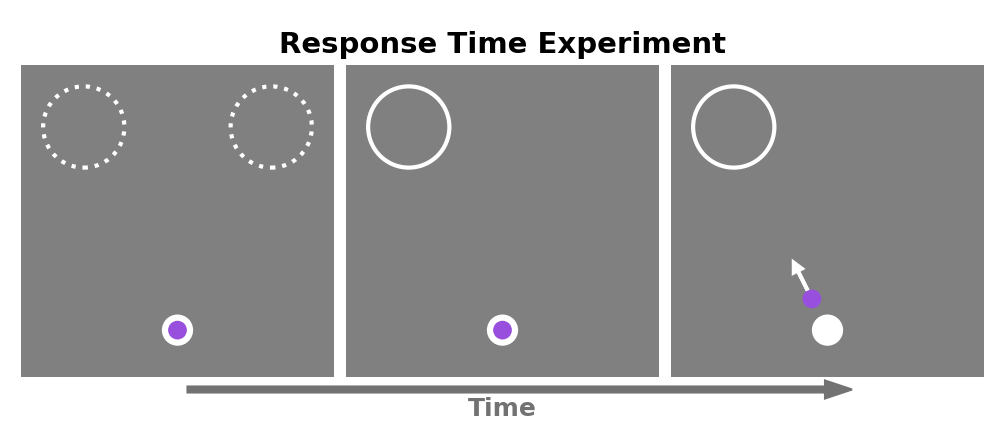

In [37]:
#* Create Shape Objects
squares = [(0,0,1,1)]*6
circle_radius = 0.13
circ_pad = 0.07
startx,starty = 0.5, 0.15
player_circle_positions =  [(startx,starty),
                            (startx,starty),
                            (startx-0.05,starty+0.1),
                            (startx,starty),
                            (startx,starty+0.1),
                            (startx,starty+0.52)]
rectangles = []
circle_patches = []
start_circles = []
player_circles = []
for i,square in enumerate(squares):
    rectangles.append(mpl.patches.Rectangle((square[0], square[1]), square[2], square[3], edgecolor='grey', facecolor='grey', lw=0,clip_on=False))
    circLx = square[0] + circle_radius + circ_pad
    circRx = square[0] + square[2] - circle_radius - circ_pad
    circy = square[1] + square[3] - circle_radius - circ_pad
    circL = mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circR = mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circle_patches.append((circL,circR))
    start_circles.append(mpl.patches.Circle((startx,starty), 0.05, edgecolor='white', facecolor='white', lw=0))
    player_circles.append(mpl.patches.Circle(player_circle_positions[i], 0.03, facecolor=constants.player_color, lw=0, zorder=10))

timing_bars = []
for i in range(3):
    timing_bars.append(mpl.patches.Rectangle([0.35+i/12,0.03], 0.3 - i/6, 0.05, color='white'))
    
#* Initialize Plot
mosaic = "abc"
fig = pf.NewFigure(mosaic, figsize=(6.5,2.75))
square_axes = [ax for k,ax in fig.axes.items()]
#* Plot upper and lower squares and associated circles
for i,ax in enumerate(square_axes):
    ax.set_aspect('equal')
    ax.add_patch(rectangles[i])
    ax.add_patch(start_circles[i])
    ax.add_patch(player_circles[i])
    if i == 0:
        ax.add_patch(mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2, ls=':'))
        ax.add_patch(mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2, ls=':'))
        
    if i == 1 or i == 2:
        ax.add_patch(circle_patches[i][0])
        if i == 2:
            ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],-0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white, zorder=2)

    if i >= 3:
        ax.add_patch(mpl.patches.Circle(((circLx+circRx)/2,circy), circle_radius, edgecolor='white', facecolor='none', lw=2, zorder=4))
        ax.add_patch(timing_bars[i-3])
        
    if i == 4:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],0,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white, zorder=2)

    # ax.add_patch(circle_patches[i][1])
        
    ax.set_xlim(0,1) # need to do this because ax arrow fucks with the xlim and ylim
    ax.set_ylim(0,1)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.spines[['left', 'bottom']].set_visible(False)  

fig.axmain.text(0.5,1.02,"Response Time Experiment", fontsize=14,fontweight="bold", color=wheel.black,
                   transform=fig.axes['b'].transAxes,ha='center',va='bottom' )
# fig.axmain.text(0.5,1.02,"Timing Uncertainty Experiment", fontsize=14,fontweight="bold", color=wheel.black,
#                         transform=fig.axes["bb"].transAxes,ha='center',va='bottom' )


#*####### Fine tuning and add time arrows ########
fig.fig.canvas.draw()
fig.fig.set_layout_engine('none')
if False:
    adj = 2
    fig.adjust_size(fig.axes['c'],(0,-adj))
    fig.adjust_position(fig.axes['c'],(0,adj/2))

    fig.adjust_position(fig.axes['a'], (0.1,0))
    fig.adjust_position(fig.axes['aa'], (0.1,0))
    fig.adjust_position(fig.axes['b'], (0.1,0))
    
#* Plot Time Arrows
for ypos in [0.25]:#,0.25]:
    fig.axmain.text(3.25, ypos-0.13, "Time", ha='center',va='center', 
                    transform=fig.axmain.transData, fontweight="bold", color=wheel.dark_grey)
    fig.axmain.arrow(1.15, ypos, 4.25, 0, transform = fig.axmain.transData, color=wheel.dark_grey, width=0.04)

#* Legend
# fig.add_letter(fig.axmain,0.0015,0.999, transform=fig.axmain.transAxes, fontsize=14)
# fig.add_letter(fig.axmain, 0.0015, 0.499, transform = fig.axmain.transAxes, fontsize=14)
# fig.remove_figure_borders()
# plt.show()
fig.savefig(SAVE_PATH / "exp1_response_time_experimental_design.png")

## Timing Uncertainty Separated

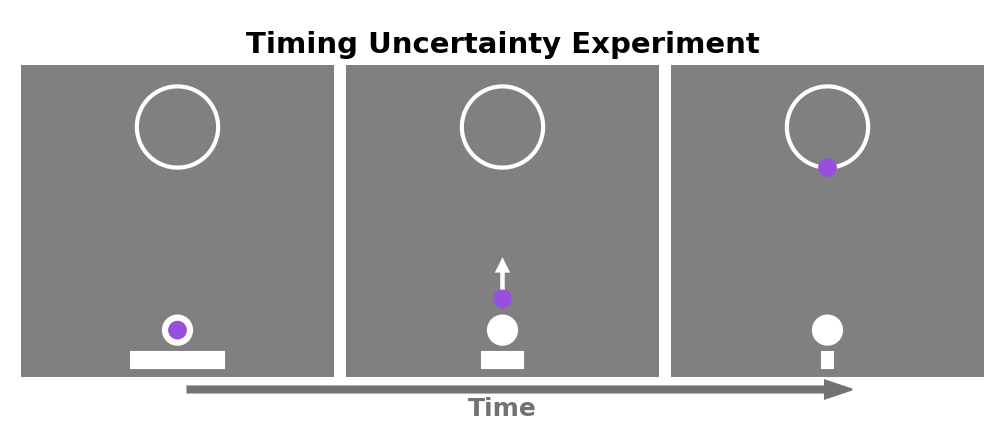

In [38]:
#* Create Shape Objects
squares = [(0,0,1,1)]*3
circle_radius = 0.13
circ_pad = 0.07
startx,starty = 0.5, 0.15
player_circle_positions =  [(startx,starty),
                            (startx,starty+0.1),
                            (startx,starty+0.52)]
rectangles = []
circle_patches = []
start_circles = []
player_circles = []
for i,square in enumerate(squares):
    rectangles.append(mpl.patches.Rectangle((square[0], square[1]), square[2], square[3], edgecolor='grey', facecolor='grey', lw=0,clip_on=False))
    circLx = square[0] + circle_radius + circ_pad
    circRx = square[0] + square[2] - circle_radius - circ_pad
    circy = square[1] + square[3] - circle_radius - circ_pad
    circL = mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circR = mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circle_patches.append((circL,circR))
    start_circles.append(mpl.patches.Circle((startx,starty), 0.05, edgecolor='white', facecolor='white', lw=0))
    player_circles.append(mpl.patches.Circle(player_circle_positions[i], 0.03, facecolor=constants.player_color, lw=0, zorder=10))

timing_bars = []
for i in range(3):
    timing_bars.append(mpl.patches.Rectangle([0.35+i/12,0.03], 0.3 - i/6, 0.05, color='white'))
    
#* Initialize Plot
mosaic = "abc"
fig = pf.NewFigure(mosaic, figsize=(6.5,2.75))
square_axes = [ax for k,ax in fig.axes.items()]
#* Plot upper and lower squares and associated circles
for i,ax in enumerate(square_axes):
    ax.set_aspect('equal')
    ax.add_patch(rectangles[i])
    ax.add_patch(start_circles[i])
    ax.add_patch(player_circles[i])

   
    ax.add_patch(mpl.patches.Circle(((circLx+circRx)/2,circy), circle_radius, edgecolor='white', facecolor='none', lw=2, zorder=4))
    ax.add_patch(timing_bars[i-3])
        
    if i == 1:
        ax.arrow(player_circle_positions[i][0], player_circle_positions[i][1], 0, 0.09, lw=1.8, 
                 head_width=0.03,head_length=0.03, color=wheel.white, zorder=2)

    # ax.add_patch(circle_patches[i][1])
        
    ax.set_xlim(0,1) # need to do this because ax arrow fucks with the xlim and ylim
    ax.set_ylim(0,1)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.spines[['left', 'bottom']].set_visible(False)  

fig.axmain.text(0.5,1.02,"Timing Uncertainty Experiment", fontsize=14,fontweight="bold", color=wheel.black,
                   transform=fig.axes['b'].transAxes,ha='center',va='bottom' )


#*####### Fine tuning and add time arrows ########
fig.fig.canvas.draw()
fig.fig.set_layout_engine('none')
if False:
    adj = 2
    fig.adjust_size(fig.axes['c'],(0,-adj))
    fig.adjust_position(fig.axes['c'],(0,adj/2))

    fig.adjust_position(fig.axes['a'], (0.1,0))
    fig.adjust_position(fig.axes['aa'], (0.1,0))
    fig.adjust_position(fig.axes['b'], (0.1,0))
    
#* Plot Time Arrows
for ypos in [0.25]:#,0.25]:
    fig.axmain.text(3.25, ypos-0.13, "Time", ha='center',va='center', 
                    transform=fig.axmain.transData, fontweight="bold", color=wheel.dark_grey)
    fig.axmain.arrow(1.15, ypos, 4.25, 0, transform = fig.axmain.transData, color=wheel.dark_grey, width=0.04)

#* Legend
# fig.add_letter(fig.axmain,0.0015,0.999, transform=fig.axmain.transAxes, fontsize=14)
# fig.add_letter(fig.axmain, 0.0015, 0.499, transform = fig.axmain.transAxes, fontsize=14)
# fig.remove_figure_borders()
# plt.show()
fig.savefig(SAVE_PATH / "exp1_timing_experimental_design.png")

# Data Figures

## Mean Movement Onset and SD

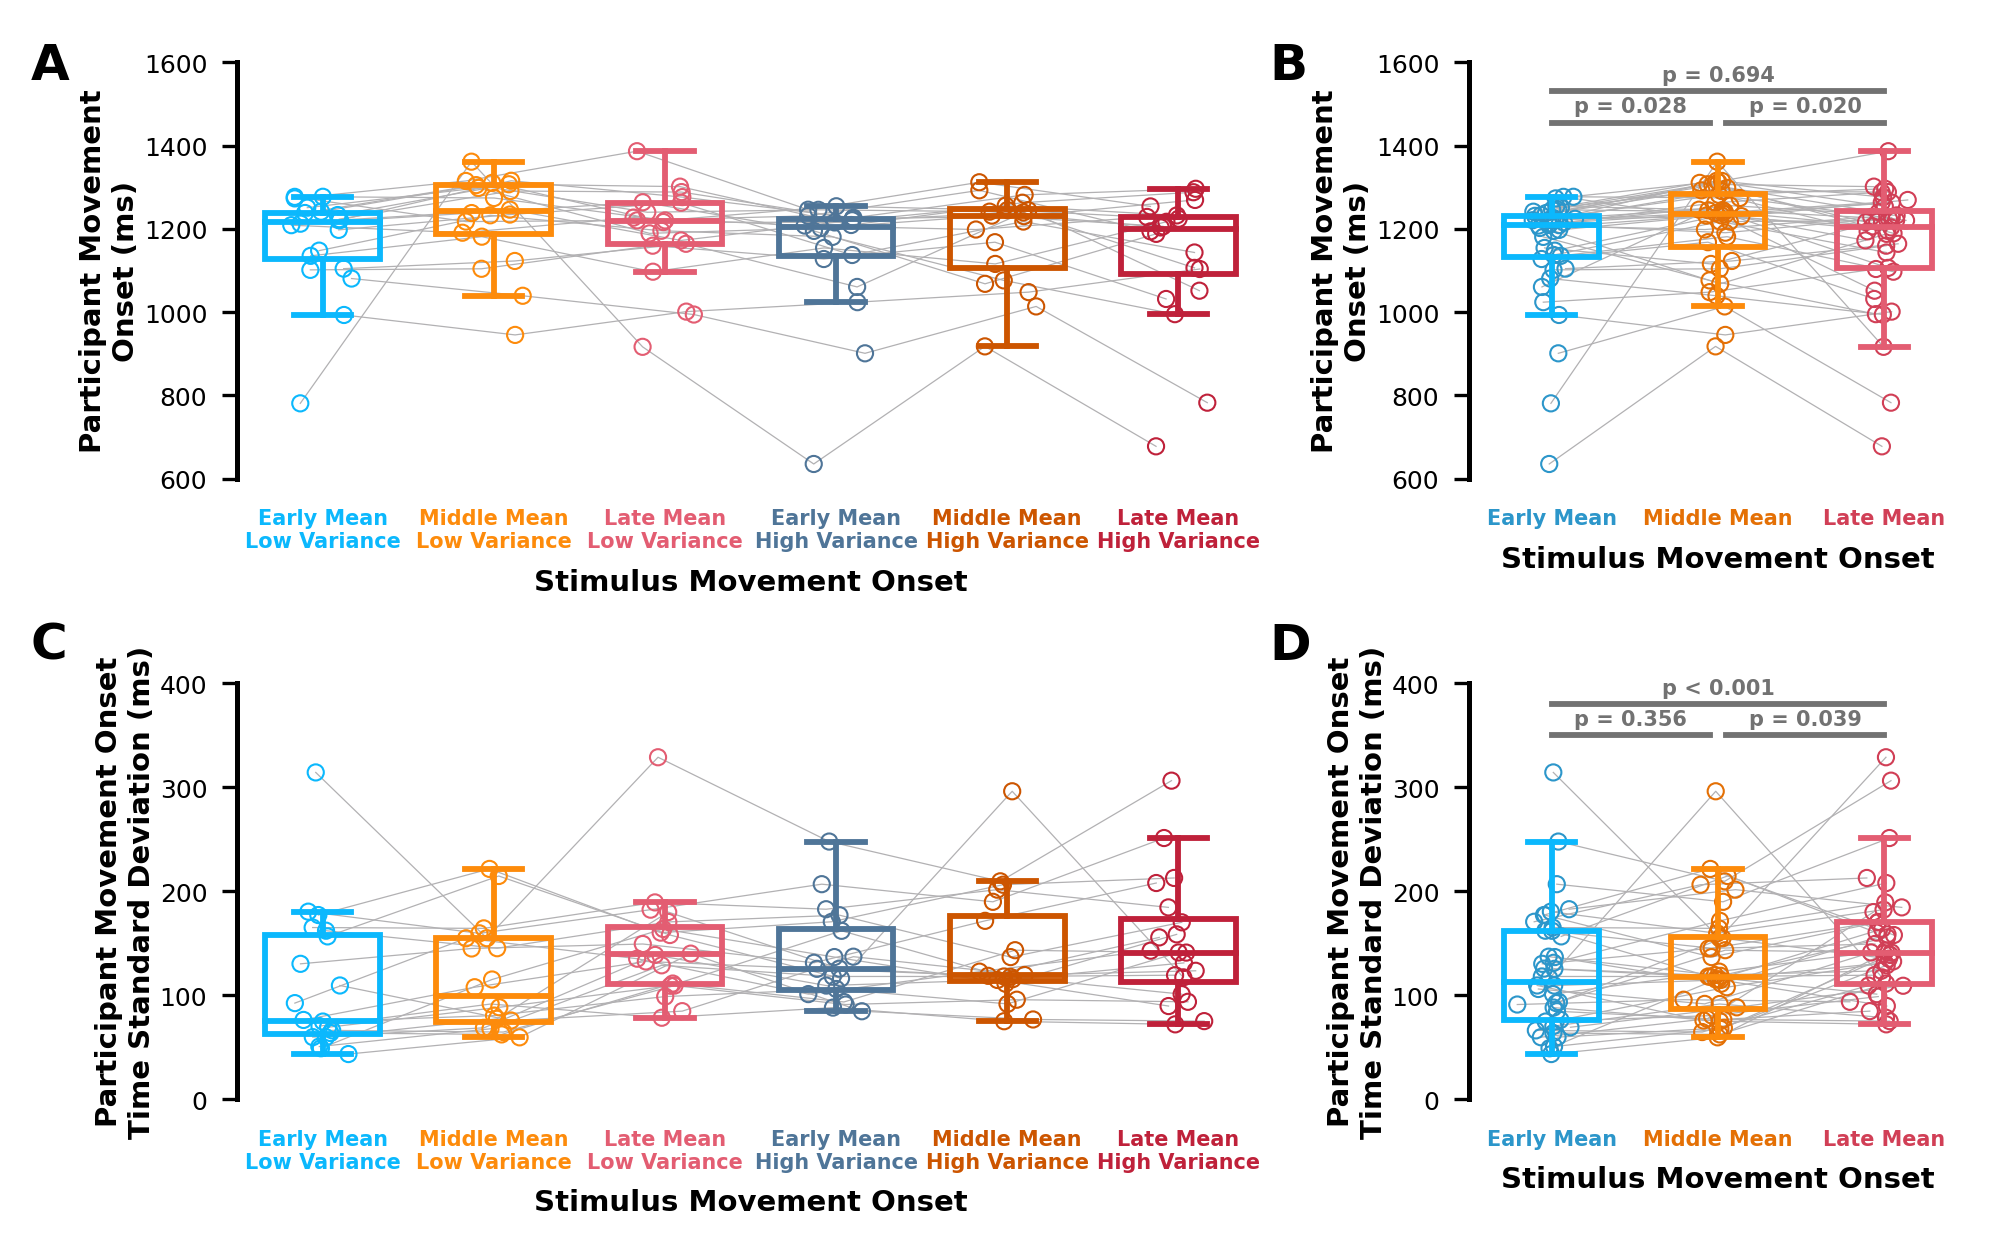

In [14]:
temp = trial_df.groupby(by=["Subject","Condition"]).agg({"reaction_decision":"sum",
                                                   "guess_decision":"sum",}).reset_index()
guess_decisions = temp.pivot(values="guess_decision", index="Subject", columns="Condition").to_numpy()
perc_guess_decisions = (guess_decisions/it.num_trials)*100
w, h = 6.5, 4
bw = (0.35 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 6.5
xticklabel_fontsize = 5
yticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

ylabelpads = [1,1,5,]
normal_metrics = np.array([participant_mean_movement_onset_time, 
                           participant_sd_movement_onset_time,
                           perc_guess_decisions])
metrics = normal_metrics[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want

collapsed_metrics1 = np.array((
    np.hstack((normal_metrics[0,:,0],normal_metrics[0,:,1])),
    np.hstack((normal_metrics[0,:,2],normal_metrics[0,:,3])),
    np.hstack((normal_metrics[0,:,4],normal_metrics[0,:,5])),
))  
collapsed_metrics2 = np.array((
    np.hstack((normal_metrics[1,:,0],normal_metrics[1,:,1])),
    np.hstack((normal_metrics[1,:,2],normal_metrics[1,:,3])),
    np.hstack((normal_metrics[1,:,4],normal_metrics[1,:,5])),
)) 
collapsed_metrics3 = np.array((
    np.hstack((normal_metrics[2,:,0],normal_metrics[2,:,1])),
    np.hstack((normal_metrics[2,:,2],normal_metrics[2,:,3])),
    np.hstack((normal_metrics[2,:,4],normal_metrics[2,:,5])),
)) 
collapsed_metrics = np.array([collapsed_metrics1,collapsed_metrics2, collapsed_metrics3])
ylocs = (
    [np.arange(0, 1601, 200)] + [np.arange(0, 401, 100)] + [np.arange(0,101,25)]
)
ylims = [(600, max(ylocs[0]))] + [(0, max(ylocs[1]))] + [(0,max(ylocs[2]))]
ylabels = [
    "Participant Movement\nOnset (ms)",
    "Participant Movement Onset\nTime Standard Deviation (ms)",
    "Guess Decisions (%)"
]
#* Stat inset thangs
stat_heights = [16,6,1]
stat_ypos = [[1455,1455,1530,], [350,350,380,], [104,104,112]]
inset_xlocs = np.linspace(1.5,3.5,num=3)
mosaic = "aaaabb;ccccdd"
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
figure_pvals = [exp1_pvals_df.query("Metric == 'Mean_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'Guess_Decisions'"),
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Mean_Movement_Onset_Time'"),
               exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
               exp1_cles_df.query("Metric == 'Guess_Decisions'"),
               ]
# * Non-Collapsed plots
for i, ax in enumerate(axs[::2]):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
        )

    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)

    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=xticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=yticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpads[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks    
    
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]

#* Collapsed plots
for i, ax in enumerate(axs[1::2]):
    for j in range(len(inset_xlocs)):
        dv.boxplot(
            ax,
            inset_xlocs[j],
            collapsed_metrics[i, j,:],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4, 
            box_width = bw*1.5,
        )
    dv.jitter_array(ax=ax,x_positions=inset_xlocs,data=collapsed_metrics[i,:,:],
                    data_color = constants.collapse_colors,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)
    
    pf.plot_stats_v2(
        ax,
        pvals=figure_pvals[i],
        cles = figure_cles[i],
        combos = ['01','12','02',],
        xlocs = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                    [inset_xlocs[1]+0.05, inset_xlocs[2]],
                    [inset_xlocs[0],inset_xlocs[2]]],
        ypos=stat_ypos[i],
        stacked=True,
        show_effectsize=False,
        lw = 1.4, 
        h = stat_heights[i],
        fontsize=5,
        shorten_length=True,
        color = wheel.lighten_color(wheel.dark_grey,1.0),
    )
    ax.set_xticks(inset_xlocs, labels=["Early Mean", "Middle Mean", "Late Mean"], fontsize=xticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels = ylocs[i], fontsize=yticklabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpads[i])
    ax.set_xlim(1.0,4)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks    
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.collapse_colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    
# fig.add_all_letters(verticalshift=0.1, horizontalshift=-0.55)
fig.add_letter(fig.axes["a"],-0.2,1.05)
fig.add_letter(fig.axes["b"],-0.4,1.05)
fig.add_letter(fig.axes["c"],-0.2,1.15)
fig.add_letter(fig.axes["d"],-0.4,1.15)
# fig.add_letter(fig.axes["e"],-0.2,1.15)
# fig.add_letter(fig.axes["f"],-0.4,1.15)
shift = -0.1
for ax_label in ["a","c"]:
    fig.adjust_position(fig.axes[ax_label], (shift/4,0)) # Shift the b and d plots to the left a bit
    fig.adjust_size(fig.axes[ax_label], (abs(shift),0)) # Make the figures all a bit wider
fig.savefig(SAVE_PATH / "exp1_movement_onset_panel.png",transparent=True)
plt.show()

## Indecisions Wins, Incorrects

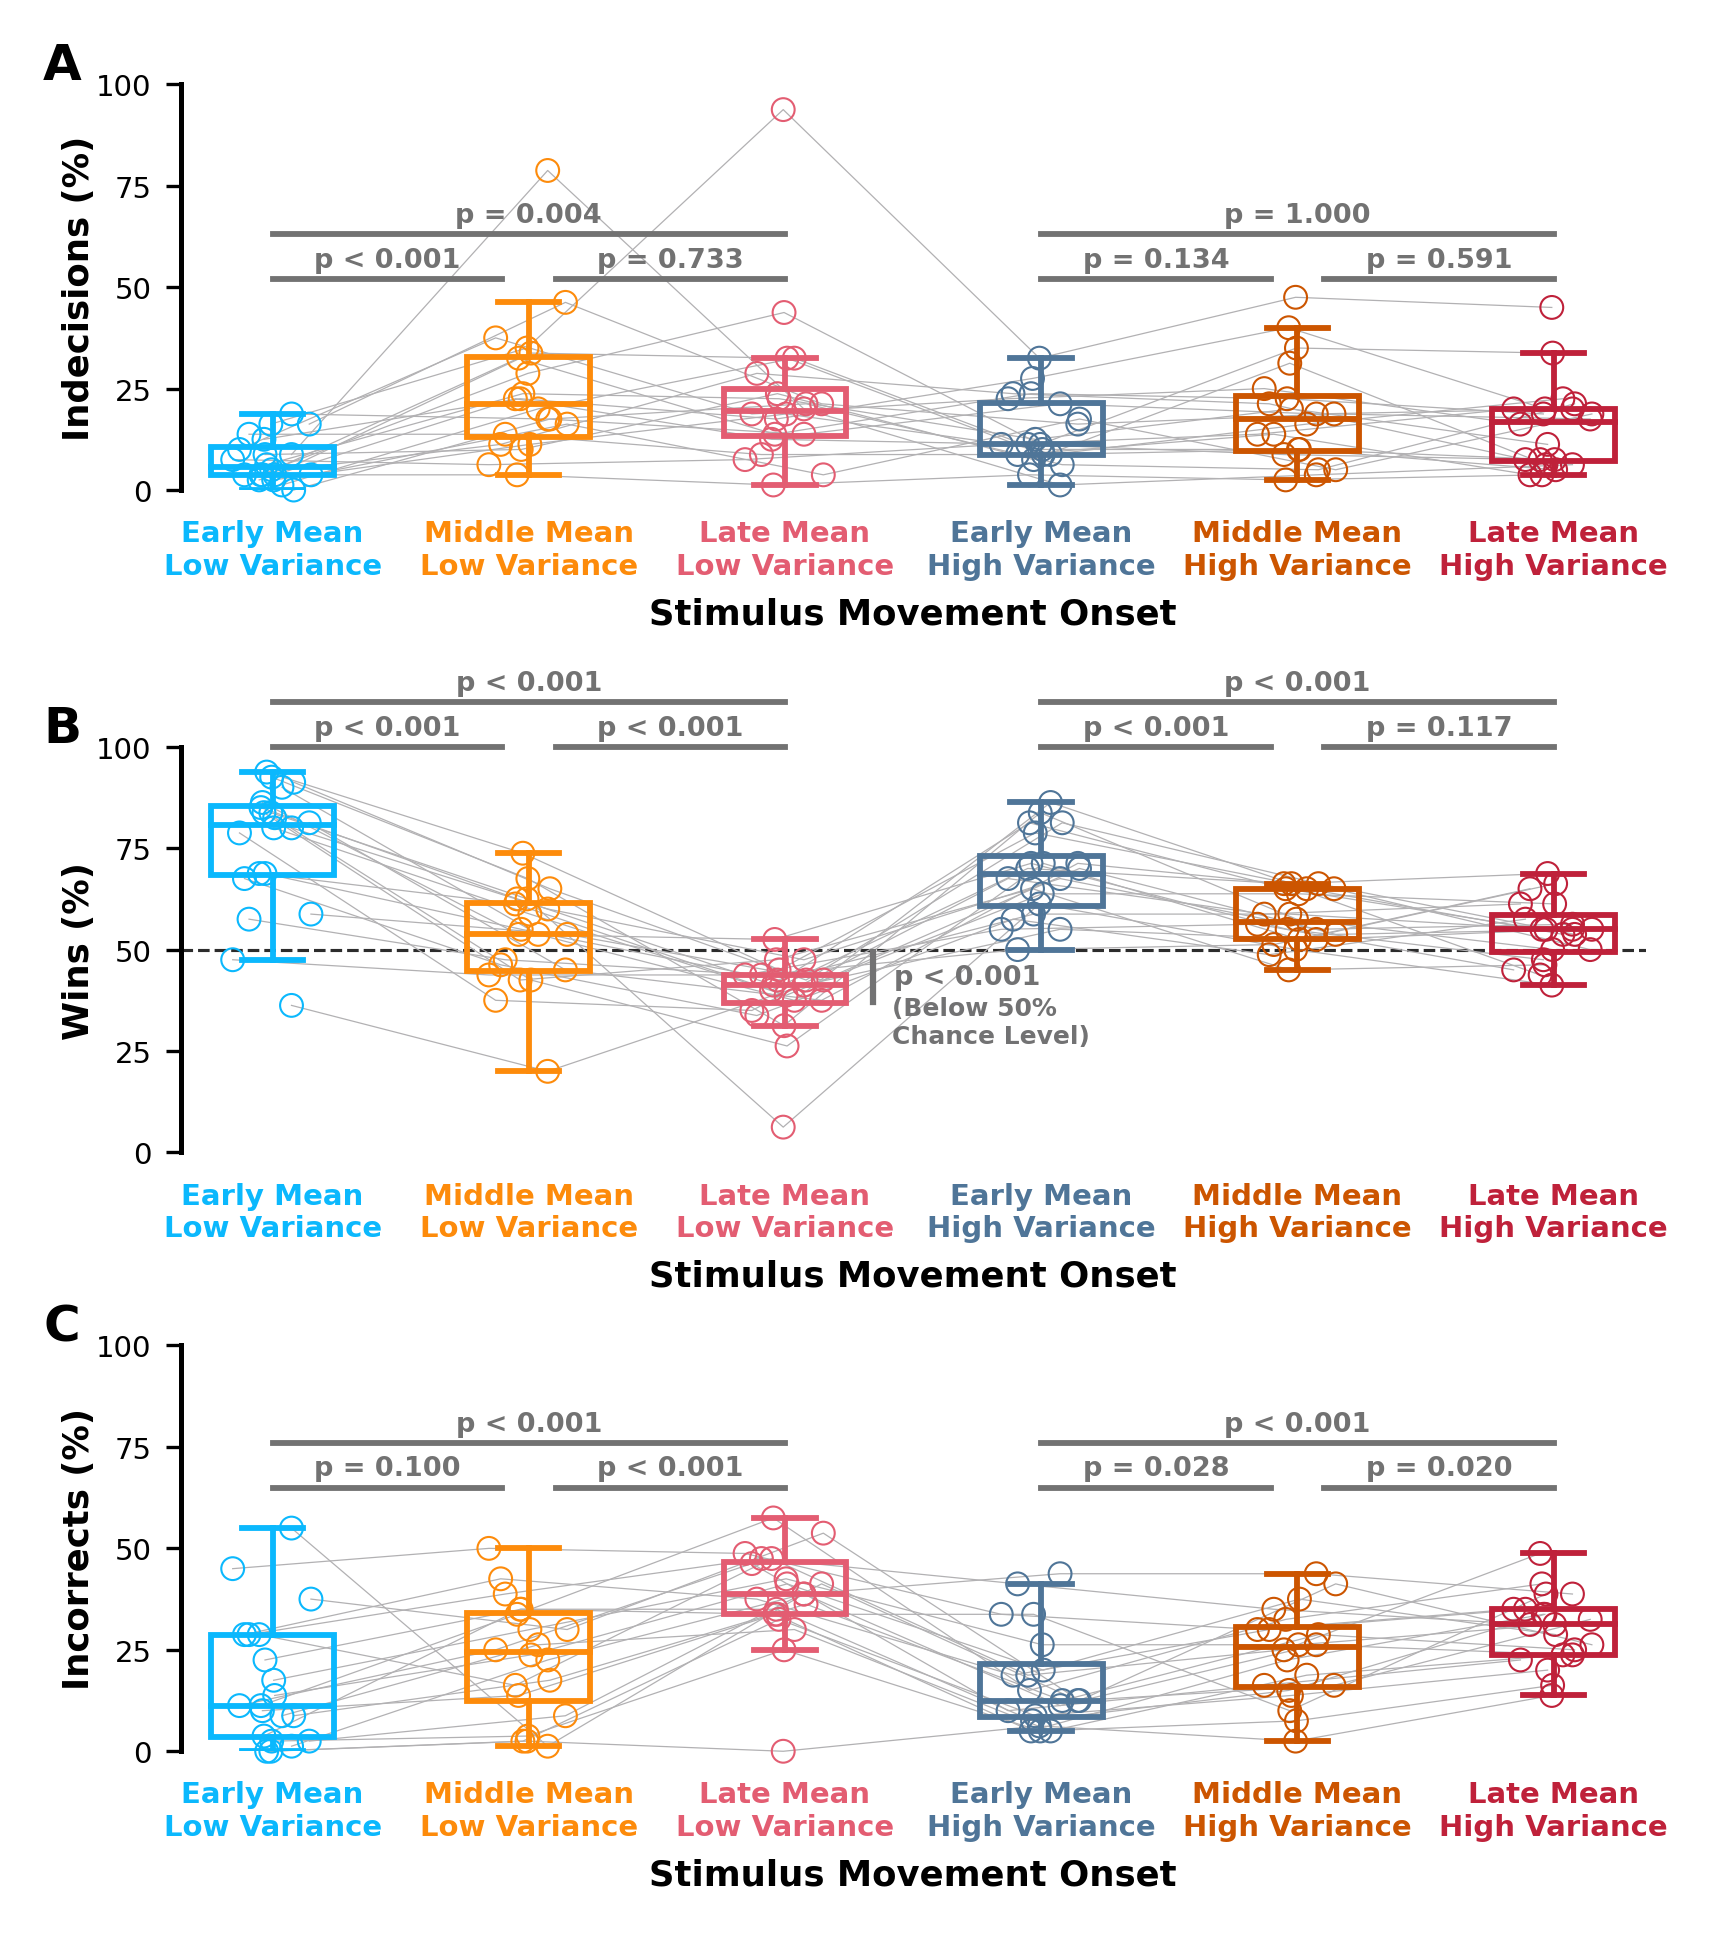

In [15]:

#* Get pvalue of 1200,50 movement onset times and zero
win_proportion = participant_wins[:,4]/it.num_trials
half_wins = np.ones(len(participant_wins))*0.5
diff_from_fifty_pval = au.bootstrap(win_proportion, half_wins, paired=True)
diff_from_fifty_cles = au.cles(win_proportion, half_wins, paired=True, alternative='less')

w, h = 5.5, 6.25
bw = (0.25 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5.5
ticklabel_fontsize = 7
suptitle_fontsize = 6
label_fontsize = 8.5
markersize = 30

ylabelpad = 0

metrics = np.array(
    [
        participant_perc_indecisions,
        participant_perc_wins,
        participant_perc_incorrects,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want
ylocs = ( [np.arange(0, 101, 25)] * 3)
ylabels = [
    "Indecisions (%)",
    "Wins (%)",
    # r"$\mathbf{\hat\theta}$",
    "Incorrects (%)",
]
ylims = [(0, 100)] * 3
#* Stat inset thangs
stat_heights = [1.5,1.5,1.5]
low = False
if low == True:
    stat_ypos = [
                [50,50,61,50,50,61],
                [11,11,1,31,31,21],
                [65,65,77,65,65,77],
                ]
else:
    stat_ypos = [
                [52,52,63,52,52,63],
                [100,100,111,100,100,111],
                [65,65,76,65,65,76],
                ]
    
model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "a;b;c"
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
figure_pvals = [exp1_pvals_df.query("Metric == 'Indecisions'"),
                exp1_pvals_df.query("Metric == 'Wins'"),
                exp1_pvals_df.query("Metric == 'Incorrects'"), 
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Indecisions'"),
               exp1_cles_df.query("Metric == 'Wins'"),
               exp1_cles_df.query("Metric == 'Incorrects'"), 
            ]

# * Looping axes for each metric
for i, ax in enumerate(axs):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
            include_mean = True, 
        )
    np.random.seed(3)
    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.04, include_mean = False, circle_size=markersize)

    if i == 1:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    pf.plot_stats_v2(
            ax,
            pvals=figure_pvals[i],
            cles = figure_cles[i],
            combos = ['02','24','04',
                      '13','35','15'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
            xlocs = [
                [xlocs[0], xlocs[1]-0.05], 
                [xlocs[1]+0.05, xlocs[2]],
                [xlocs[0], xlocs[2]],
                [xlocs[3], xlocs[4]-0.05],
                [xlocs[4]+0.05, xlocs[5]],
                [xlocs[3], xlocs[5]],
            ],
            ypos=stat_ypos[i],
            stacked=True,
            show_effectsize=False,
            lw = 1.4, 
            h = stat_heights[i],
            fontsize=6.5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.0),
        )
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks 
    
#* Plot diff from zero pvalue
dv.stat_annotation(fig.axes['b'], x1=xlocs[2]+0.34, x2= xlocs[2]+0.34, y=40,  
                   p_val=diff_from_fifty_pval,fontsize=6.5, color=wheel.dark_grey)
fig.axes['b'].plot([1.12,1.12],[49.5,37],color=wheel.dark_grey)
# One line 50% Chance Level
# fig.axes['b'].text(xlocs[2]+0.2, 38.5, "(Below 50% Chance Level)", fontsize=6, 
#                    color=wheel.dark_grey, fontweight="bold", ha='left', va='top')

# Two lines 50% chance level
fig.axes['b'].text(xlocs[2]+0.2, 38.5, "(Below 50%\nChance Level)", fontsize=6, 
                   color=wheel.dark_grey, fontweight="bold", ha='left', va='top')

# Add letters and adjust position
fig.add_all_letters(verticalshift=0.15, horizontalshift=-0.4)
fig.adjust_position(fig.axes['b'], (0,-0.05)) # Shift the b plot down a bit for even spacing bc of p values

#     fig.adjust_size(fig.axes[ax_label], (0,abs(shift)/2)) # Make the figures all a bit wider
# plt.subplots_adjust(right=0.8) 
# plt.subplot_tool()
# fig.axmain.patch.set_facecolor('white')
# plt.show()
fig.savefig(SAVE_PATH / "exp1_score_metrics_panel.png",transparent=True)

In [16]:
np.median(metrics[0],axis=0)

array([ 5.625, 21.25 , 19.375, 11.25 , 17.5  , 16.875])

# Model Figures

In [17]:
def find_mse_loss(df, data):
    metrics = ["mean_movement_onset_time", "sd_movement_onset_time", 
                "indecisions","wins","incorrects"]
    
    for i,metric_name in enumerate(metrics):
        mse_losses_per_metric = []
        prediction_ser = df[metric_name]
        for index,row in prediction_ser.items():
            # TODO Need to figure out how to take the mean when I have 20,6 data points and 6 
            # print(data[i])
            # print(row)
            mse_loss = np.mean((data[i]-row)**2)
            mse_losses_per_metric.append(mse_loss)
        df[metric_name+"_mse_loss"] = mse_losses_per_metric
    return df

def find_aic_bic(df):
    metrics = ["mean_movement_onset_time", "sd_movement_onset_time", 
                "indecisions","wins","incorrects"]
    num_data_points = 20
    for metric_name in metrics:
        df[metric_name+'_bic'] = df['num_parameters']*np.log(num_data_points) + 2*np.log(df[metric_name+"_mse_loss"])
        df[metric_name+'_aic'] = 2*df['num_parameters'] + 2*np.log(df[metric_name+'_mse_loss'])
    return df

## Load Models

In [18]:
BOOTSTRAPPED_MODELS = True
if BOOTSTRAPPED_MODELS:
    p = "bootstrapped"
else:
    p = "warmstart"
    
path = constants.MODELS_PATH / f"{p}_models"
# model_names = ["Base","Optimal","Suboptimal_All"]#, "Suboptimal Partial"]
model_names = ["Base","Optimal","Suboptimal_Partial"]#, "Suboptimal Partial"] #! 07/03/24 I was using suboptimal all previously but I thought I was using partial
model_results = []
model_inputs = []
indices = [-1, -1, -1]
for i,model in enumerate(model_names):
    #* load model
    results_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_results*"))[indices[i]]
    inputs_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_inputs*"))[indices[i]]
    print(results_path)
    print(inputs_path)
    #* Get inputs df
    temp_inputs = pd.read_pickle(path / inputs_path)
    model_inputs.append(temp_inputs)
    
    #* Get results df
    temp_results = pd.read_pickle(path / results_path)
    
    #* Get number of parameters
    try:
        temp_results['num_parameters'] = 7 + temp_results["fit_parameters"].apply(len) # Add on number of parameters
    except KeyError:
        temp_results['num_parameters'] = 7
        
    #* Get mse loss for each row in df
    data = [participant_mean_movement_onset_time, participant_sd_movement_onset_time, 
            participant_perc_indecisions/100, participant_perc_wins/100, participant_perc_incorrects/100]
    temp_results = find_mse_loss(temp_results, data)
    
    #* Get AIC and BIC for each of the metrics
    temp_results = find_aic_bic(temp_results)
    model_results.append(temp_results)
    
    


    
#* Put model results into lists of dictionaries for plotting
col_names = ["mean_movement_onset_time", "sd_movement_onset_time",
              "indecisions", "wins", "incorrects",]
base_medians = {}
base_intervals = {}
optimal_medians = {}
optimal_intervals = {}
suboptimal_medians = {}
suboptimal_intervals = {}
for i,col_name in enumerate(col_names):
    base_arr = np.stack(model_results[0][col_name].to_numpy())
    optimal_arr = np.stack(model_results[1][col_name].to_numpy())
    suboptimal_arr = np.stack(model_results[2][col_name].to_numpy())
    base_medians.update({col_name:np.median(base_arr,axis=0)[[0,2,4,1,3,5]]})
    base_intervals.update({col_name:np.percentile(base_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})
    optimal_medians.update({col_name:np.median(optimal_arr,axis=0)[[0,2,4,1,3,5]]})
    optimal_intervals.update({col_name:np.percentile(optimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]}) 
    suboptimal_medians.update({col_name:np.median(suboptimal_arr,axis=0)[[0,2,4,1,3,5]]})
    suboptimal_intervals.update({col_name:np.percentile(suboptimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})
    
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]
    
    

d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_results_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_inputs_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_results_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_inputs_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_suboptimal_partial_bootstrapped_results_2024_07_22_07_06_37.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_

In [19]:
def bic(n, k, loss):
    return k*np.log(n) + n*np.log(loss)

print(bic(20, 7, 5000))
print(bic(20,12,100))

191.3139897432027
128.05219100240973


In [20]:
list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_results*"))

[WindowsPath('d:/OneDrive - University of Delaware - o365/Desktop/MatchPennies-Agent-Expirement/results/models/bootstrapped_models/Exp1_suboptimal_partial_bootstrapped_results_2023_12_07_14_27_33.pkl'),
 WindowsPath('d:/OneDrive - University of Delaware - o365/Desktop/MatchPennies-Agent-Expirement/results/models/bootstrapped_models/Exp1_suboptimal_partial_bootstrapped_results_2024_07_02_06_42_00.pkl'),
 WindowsPath('d:/OneDrive - University of Delaware - o365/Desktop/MatchPennies-Agent-Expirement/results/models/bootstrapped_models/Exp1_suboptimal_partial_bootstrapped_results_2024_07_02_06_42_00_new.pkl'),
 WindowsPath('d:/OneDrive - University of Delaware - o365/Desktop/MatchPennies-Agent-Expirement/results/models/bootstrapped_models/Exp1_suboptimal_partial_bootstrapped_results_2024_07_02_06_42_00_new_new.pkl'),
 WindowsPath('d:/OneDrive - University of Delaware - o365/Desktop/MatchPennies-Agent-Expirement/results/models/bootstrapped_models/Exp1_suboptimal_partial_bootstrapped_results_

## Model Distribution of Target Reach Times

In [21]:
# Model Diagram Function
def underline_annotation(ax, text):
    fig = plt.gcf()
    tb = text.get_tightbbox() # returns in pixels
                            # text isn't drawn immediately and must be 
                            # given a renderer if one isn't cached.
                                # tightbbox return units are in 
                                # 'figure pixels', transformed 
                                # to 'figure fraction'.
    print(tb.x0, tb.y0)
    print(tb.x1, tb.y1)
    ax.annotate('', xy=(tb.x0,tb.y0), xytext=(tb.x1,tb.y0),
                xycoords="figure pixels",
                arrowprops=dict(arrowstyle="-", color='k'))
    
def model_diagram(ax, known_inputs, unknown_inputs_grey, unknown_inputs_color, special_inputs,
                  xmin=0, xmax=0.74, ymin=0, ymax=1.0, 
                  model_color=wheel.grey, known_color = "#00B3B8", unknown_color="#8DC73E",hide_axis=True):
    xmid = (xmin + xmax)/2
    ymid = (ymin + ymax)/2  
    policy_rect = mpl.patches.Rectangle((xmin,ymin),xmax - xmin, ymax-ymin, lw=2, edgecolor=model_color, fill=None, clip_on=False)
    ax.add_patch(policy_rect)
    ax.text(xmid,0.9,"Decision Policy", ha='center', va='center', fontsize=7, color=model_color, fontweight="bold")
    ax.text(xmid,0.82,"(Maximize Reward)", ha='center', va='center', fontsize=6.5, color=model_color, fontweight="bold")
    ax.plot((xmin,xmax),(0.75,0.75), clip_on=False, color=model_color, ls='--', lw=1)

    #Known text with underline
    known_ypos = 0.7
    text = ax.text(xmid, known_ypos, "Full Knowledge",ha='center',va='center',fontsize=6.5, color=model_color, fontweight="normal")
    ax.plot((xmid-0.21,xmid+0.21),(known_ypos-0.03,known_ypos-0.03), color=model_color, lw=0.5) # Underline
    ax.text(xmid, known_ypos - 0.05, known_inputs,color=model_color,     
            fontweight="light",ha='center',va='top',fontsize=6)

    # Known INputs special (timing ucnertainty and switch time)
    ax.text(xmid, known_ypos - 0.32, special_inputs,color=unknown_color,     
            fontweight="bold",ha='center',va='top',fontsize=6)
    
    # Text with underline
    unknown_ypos = 0.19
    ax.plot((xmin,xmax),(unknown_ypos+0.05,unknown_ypos+0.05), clip_on=False, color=model_color, ls='-', lw=1) # Top line
    ax.text(xmid, unknown_ypos, "Partial Knowledge",ha='center',va='center',fontsize=6.5, color=constants.model_colors[i], fontweight="normal")
    ax.plot((xmid-0.24,xmid+0.24),(unknown_ypos-0.03,unknown_ypos-0.03), color=constants.model_colors[i], lw=0.5) # Underline
    ax.text(xmid, unknown_ypos+0.03, unknown_inputs_grey,color=constants.model_colors[i],      
            fontweight="normal",ha='center',va='top',fontsize=6)
    ax.text(xmid, unknown_ypos - 0.04, unknown_inputs_color,color=unknown_color,      
            fontweight="bold",ha='center',va='top',fontsize=6)
    
    # Model Name Labels
    ax.set_title(constants.model_names[i], fontsize=7.5, color=constants.model_colors[i], x=0.37, y=1, ha='center')
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if hide_axis:
        ax.set_axis_off()
            

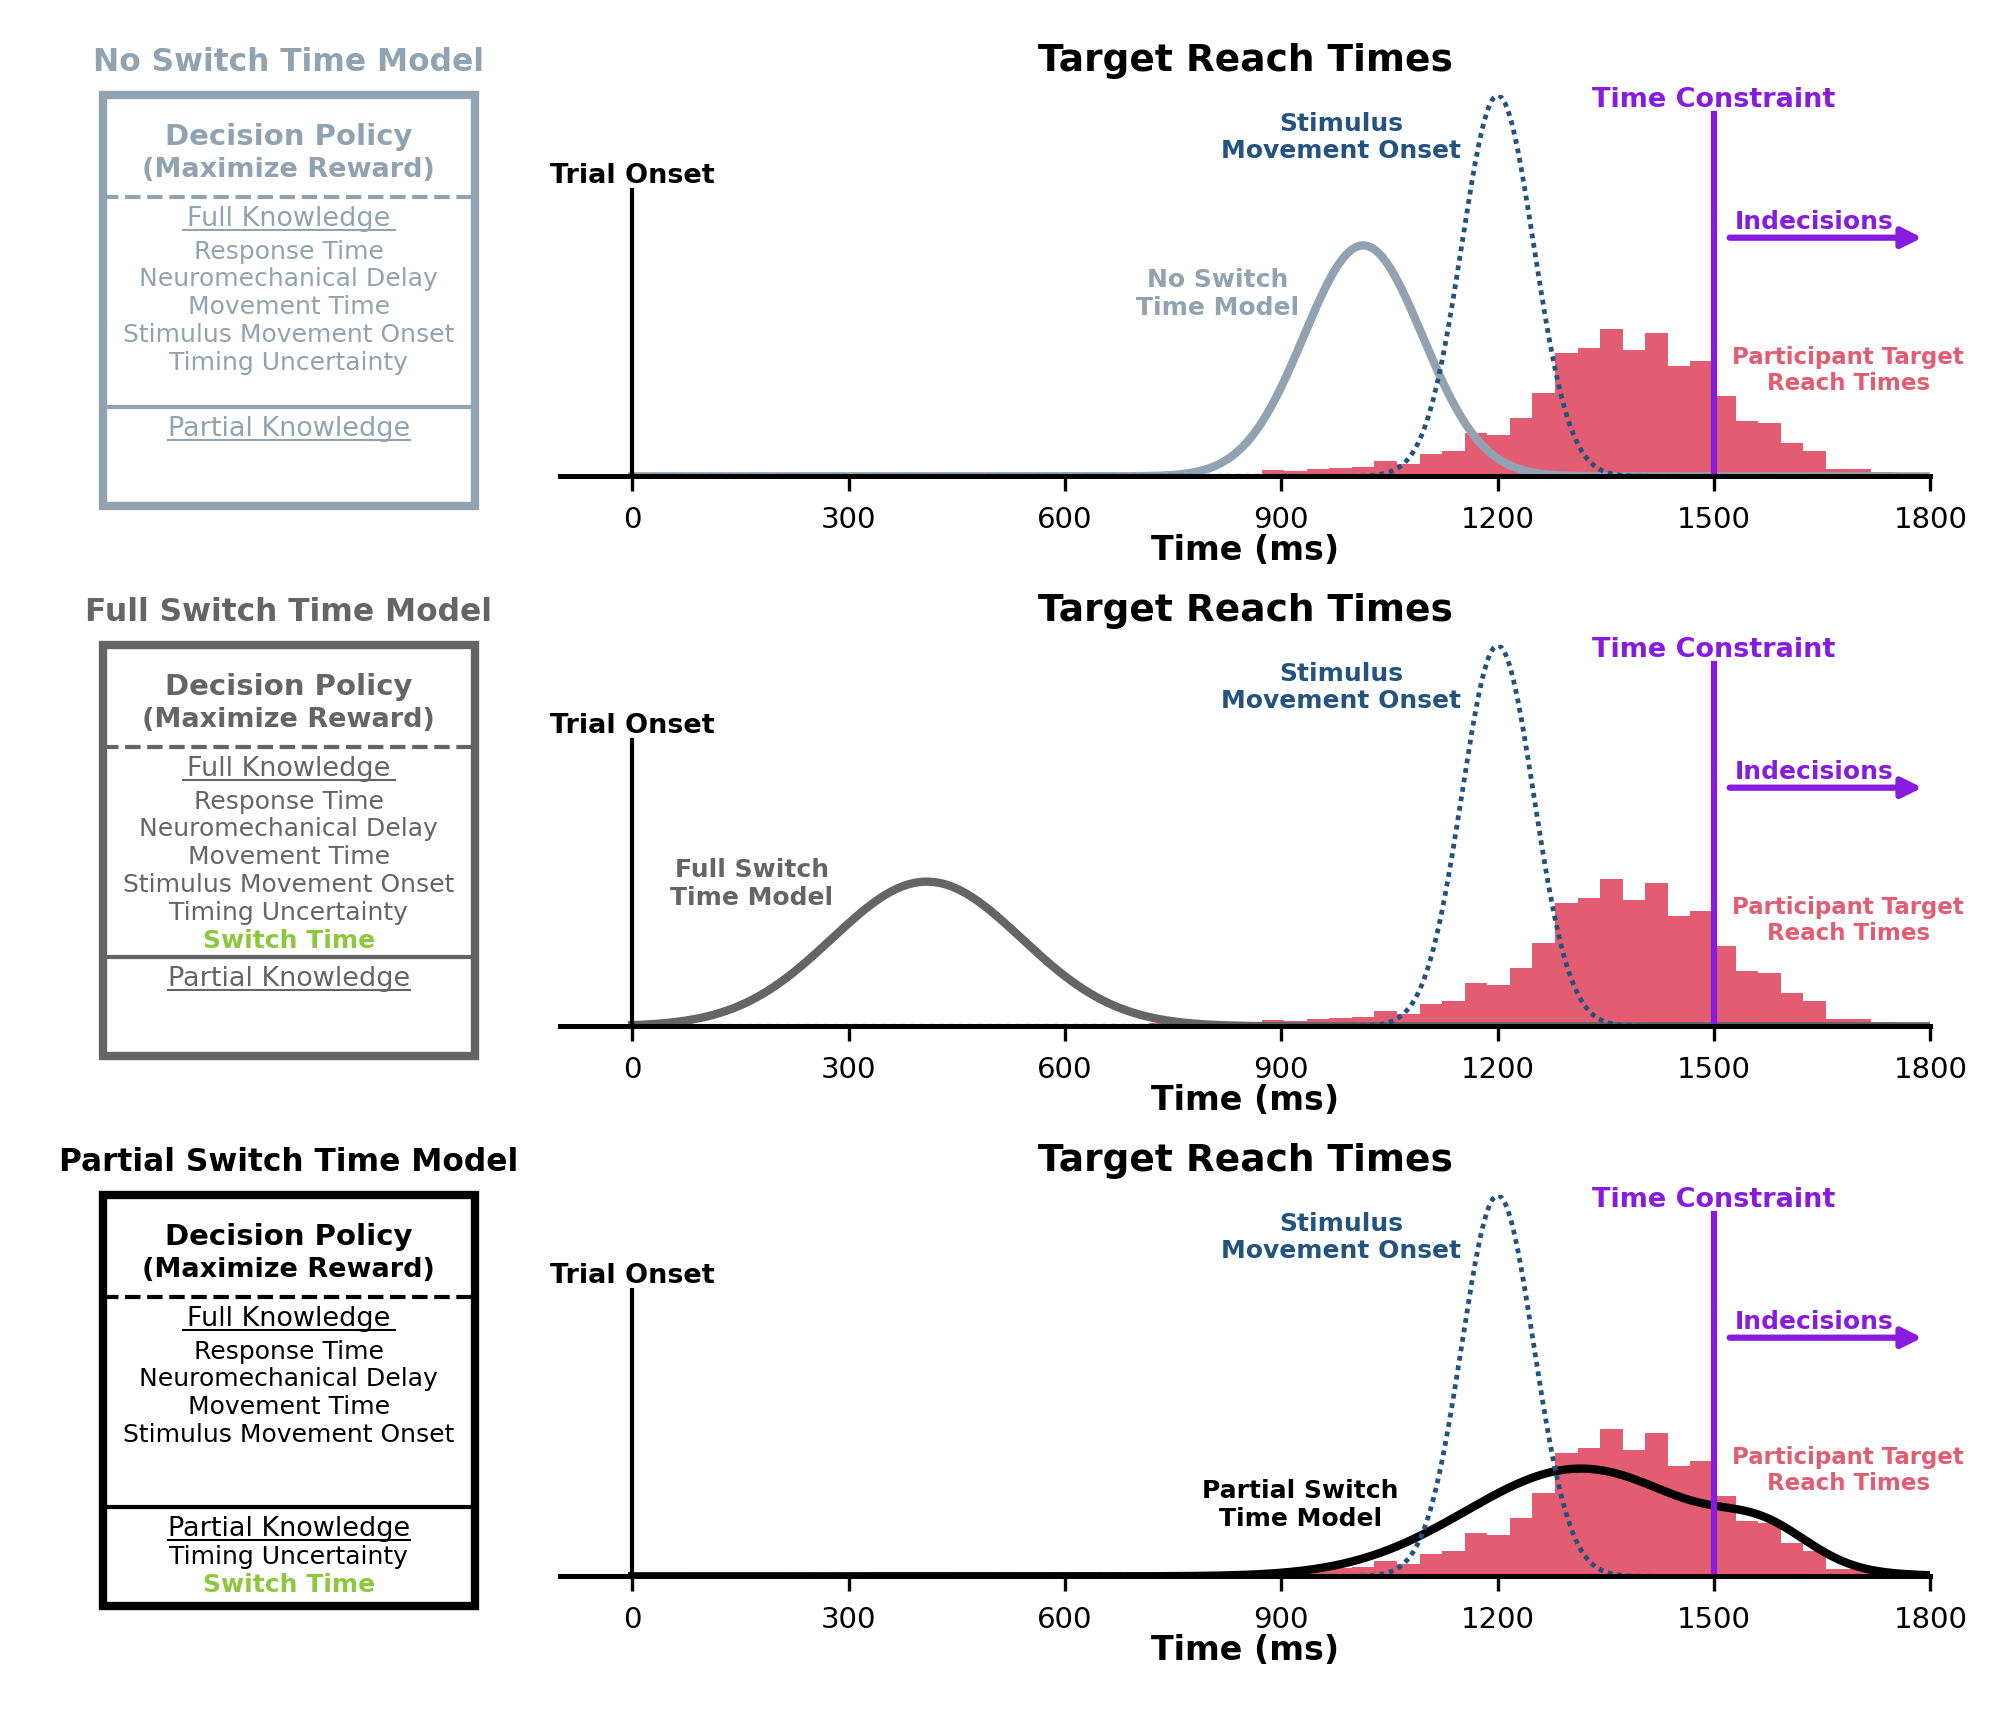

In [22]:

# * List of lists, react goes first on the inner list
# * Outer list is for each model
median_target_reach_times = []
sd_target_reach_times = []
prob_selecting = []
#* Get model Data to plot the joint target reach time (using react and guess target reach times/sd)
for i,model_df in enumerate(model_results):
    reaction_reach_time = np.nanmedian(np.stack(model_df["target_reach_times_react"].to_numpy()),axis=0)
    guess_reach_time = np.nanmedian(np.stack(model_df["target_reach_times_guess"].to_numpy()),axis=0)
    median_target_reach_times.append([reaction_reach_time, guess_reach_time])
    
    reaction_reach_time_sd = np.nanmedian(np.stack(model_df["target_reach_times_react_sd"].to_numpy()),axis=0)
    guess_reach_time_sd = np.nanmedian(np.stack(model_df["target_reach_times_guess_sd"].to_numpy()),axis=0)
    sd_target_reach_times.append([reaction_reach_time_sd, guess_reach_time_sd])
    
    prob_selecting_react = np.nanmedian(np.stack(model_df["prob_selecting_reaction"].to_numpy()),axis=0)
    prob_selecting_guess = np.nanmedian(np.stack(model_df["prob_selecting_guess"].to_numpy()),axis=0)
    prob_selecting.append([prob_selecting_react, prob_selecting_guess])
    
#* Create Figure
fig = pf.NewFigure("bx;cy;dz",figsize=(6.5,5.5), dpi=300, width_ratios=[0.35,1])

#* Plot Panel A
model_titles = {'b':"Optimal Model (No Switch Time)",
                "c":"Optimal Model (With Switch Time)",
                "d":"Suboptimal Model (With Switch Time)"}
figure_name = {'b':"new_model_light_grey.png",
               'c':"new_model_dark_grey.png",
               'd':"new_model_black.png"}
 
 #* Participant movement onset distribution 
 
# Plot Dsitributions
condition = 4 # 1200,50 condition bc the model is ordered that way
dist_axes = [fig.axes['x'], fig.axes['y'], fig.axes['z']]
for i,(median,sd) in enumerate(zip(median_target_reach_times,sd_target_reach_times)):
    xvals = np.arange(0,2000)
    norm_react = stats.norm.pdf(xvals, median[0][condition], sd[0][condition])*prob_selecting[i][0][condition]
    norm_guess = stats.norm.pdf(xvals, median[1][condition], sd[1][0][condition])*prob_selecting[i][1][condition]
    added_norm = norm_react + norm_guess
    norm_stimulus = stats.norm.pdf(xvals, 1200 , 50)
    participant_movement_onset_dist = trial_df[trial_df["Condition"]=="4"]["target_reach_time"]
    
    ax = dist_axes[i]
    # fig.axes['a'].plot(xvals,norm_react, c=constants.model_colors[i], ls='--')
    # fig.axes['a'].plot(xvals,norm_react, c='blue',lw=2)
    # fig.axes['a'].plot(xvals,norm_guess, c='green',lw=2)
    ax.plot(xvals,added_norm, c=constants.model_colors[i],lw=2)
    ax.hist(participant_movement_onset_dist, bins = 50, color= constants.xticklabel_colors_sd[condition], density=True)
    ax.plot(xvals,norm_stimulus, c=wheel.lighten_color(wheel.dark_blue,1.0), lw=1.15, ls=(0, (1, 1))) #! Using xticklabel_colors_sd bc condition 4 is for the correct model
    ax.set_xlim(0,1800)
    ax.set_ylim(0,0.008)

    # Plot extras
    vertical_line_color = wheel.plum
    ax.axvline(1500,ymax=0.95, color=vertical_line_color,lw=1.5,ls='-')
    ax.text(1500,0.97,"Time Constraint", ha='center',
                    transform = ax.get_xaxis_transform(),
                    fontsize=6.5,fontweight='bold',color=vertical_line_color)
    ax.axvline(0,ymax=0.75, color=wheel.black,lw=1,ls='-')
    ax.text(0,0.77,"Trial Onset", ha='center',
                    transform = ax.get_xaxis_transform(),
                    fontsize=6.5,fontweight='bold',color=wheel.black)
    
    
    xticks = np.arange(0,2001,300)
    ax.set_xticks(xticks,labels=xticks, fontsize=7)
    ax.set_xlabel("Time (ms)", fontsize=8, labelpad=0)
    ax.set_yticks([])
    ax.spines[['left']].set_visible(False)
    # ax.fill_between(xvals[1500:],0,added_norm[1500:],color=wheel.dark_blue, alpha=0.7)
    
    # INDECISIONS ARROW
    ax.text(0.915,0.65,"Indecisions",ha='center',transform=ax.transAxes, 
                    fontsize=6, color=wheel.plum, fontweight="bold")
    
    arrow = mpl.patches.FancyArrowPatch((1510,0.005), (1800,0.005),arrowstyle="-|>",mutation_scale=10,lw=1.5,
                                        transform=ax.transData, 
                                        color=wheel.plum, zorder=90)
    ax.add_patch(arrow)

    ax.set_title("Target Reach Times",fontsize=9)
    ax.set_xlim(-100,1800)
    ax.text(0.57,0.89,"Stimulus\nMovement Onset", 
                   fontweight="bold", fontsize=6, transform=ax.transAxes, 
                   ha='center', va='center', color = wheel.dark_blue)
    ax.text(0.94,0.28,"Participant Target\nReach Times", 
                   fontweight="bold", fontsize=5.5, transform=ax.transAxes, 
                   ha='center', va='center', color = constants.xticklabel_colors_means[2])
# fig.axes['a'].set_ylim(0,0.0089)
locations = ["upper left", "upper center", "upper right"]

#* Panel A Legend
# dv.Custom_Legend(fig.axes['a'], labels=constants.model_names + ["Participant Target Reach Time"], 
#                  colors=constants.model_colors + [constants.xticklabel_colors_sd[condition]], 
#                  ncols=1, loc='upper left', fontsize=7, handlelength=0,
#                  )
fig.axes['x'].text(0.48,0.48,"No Switch\nTime Model", 
                   fontweight="bold", fontsize=6, transform=fig.axes['x'].transAxes, 
                   ha='center', va='center', color=constants.model_colors[0])
fig.axes['y'].text(0.14,0.375,"Full Switch\nTime Model", 
                   fontweight="bold", fontsize=6, transform=fig.axes['y'].transAxes, 
                   ha='center', va='center', color=constants.model_colors[1])
t = fig.axes['z'].text(0.54,0.19,"Partial Switch\nTime Model", 
                   fontweight="bold", fontsize=6, transform=fig.axes['z'].transAxes, 
                   ha='center', va='center', color = constants.model_colors[2])
# t.set_bbox(dict(facecolor="white",alpha=1, edgecolor="none", linewidth=0))

# fig.add_letter(fig.axes['a'], -0.04, 1.12)

# I want constrained to include this letter

#* Plot Models
blue_green="#00B3B8"
lime_green="#8DC73E"
xmin,xmax = 0,0.74
ymin,ymax = 0,1.0
known_inputs = ["Response Time\nNeuromechanical Delay\nMovement Time\nStimulus Movement Onset\nTiming Uncertainty",
                "Response Time\nNeuromechanical Delay\nMovement Time\nStimulus Movement Onset\nTiming Uncertainty",
                "Response Time\nNeuromechanical Delay\nMovement Time\nStimulus Movement Onset",
]
special_inputs = ["",
                  "\nSwitch Time",
                  ""
                  ]
unknown_inputs_color = ["",
                  "",
                  "\nSwitch Time"]
unknown_inputs_grey = ["",
                       "",
                       "\nTiming Uncertainty"]

for i,ax in enumerate([fig.axes['b'],fig.axes['c'],fig.axes['d']]):
    model_diagram(ax, 
                  known_inputs=known_inputs[i], 
                  special_inputs=special_inputs[i], 
                  unknown_inputs_color=unknown_inputs_color[i], 
                  unknown_inputs_grey=unknown_inputs_grey[i], 
                  model_color=constants.model_colors[i], 
                  hide_axis=True)

shift = 0.1
size = 0.2
for name in ['b','c','d']:
    fig.adjust_size(fig.axes[name],(0.08,0.1))
    fig.adjust_position(fig.axes[name],(0.2,-0.1))
    
# fig.adjust_position(fig.axes['b'],(0,0.1))
# fig.adjust_position(fig.axes['c'],(-0,0.1))
# fig.adjust_position(fig.axes['d'],(-0.0,0.1))
xmid = (xmin + xmax)/2
# text = fig.axes['b'].text(xmid, 0.7, "Known Inputs",ha='center',va='center',fontsize=6.5, color="grey", fontweight="bold")
# underline_annotation(fig.axes['b'], text)
# fig.add_letter(fig.axes['b'], 0.025, 5.4, transform=fig.axmain.transData, va='center')
# plt.show()
fig.savefig(SAVE_PATH / "model_diagram.png")


## Full Panel w/ Models

In [23]:
from matplotlib.lines import Line2D

def legend(ax, labels, colors, ncol = 1,
            fontsize = 6, linewidth = None, 
            framealpha = 0, loc = "best", fontweight = "bold",
            columnspacing = 0, linestyle = None, lw = None, 
            ls = None, handlestyle="bar", markersize=None, handletextpad=None, 
            labelspacing=None, **kwargs):
    """
    Creates Custom colored legend
    Parameters
    **kwargs: Additional keyword arguents to be passed to pyplot.legend()
    
    Returns a legend object
    """
    
    if len(labels) != len(colors):
        raise RuntimeError("Number of Labels should match number of Colors.")
        
    if lw == None and linewidth == None:
        linewidth = 4
    elif lw != None and linewidth == None:
        linewidth = lw
        
    if ls == None and linestyle == None:
        linestyle = "-"
    elif ls != None and linestyle == None:
        linestyle = ls
        
    if not isinstance(linestyle,(list, np.ndarray)):
        linestyle = [linestyle]*len(colors)        
    
    if handletextpad is None:
        handletextpad = 0
    
    custom_handles = []            
    if handlestyle == "bar":
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([0], [0], color=color, 
                                         lw=linewidth, ls = linestyle[i]))
    elif handlestyle in ["circle","o"]:
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([], [], marker='o', markersize=markersize, 
                                         markerfacecolor=color, markeredgecolor=color, 
                                         ls="none", lw=linewidth))
    elif isinstance(handlestyle,list):
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([], [], marker=handlestyle[i], markersize=markersize, 
                                         markerfacecolor=color, markeredgecolor=color, 
                                         ls="none", lw=linewidth))
            print(handlestyle[i])
            
    leg = ax.legend(custom_handles, labels, fontsize = fontsize,
             framealpha = framealpha, loc = loc, ncol = ncol, 
             columnspacing = columnspacing, handletextpad=handletextpad, 
             labelspacing=labelspacing, **kwargs)
    
    leg_text = leg.get_texts()
    for i, text in enumerate(leg_text):
        text.set_color(colors[i])
        text.set_weight(fontweight)
        
    return leg

o
s
d


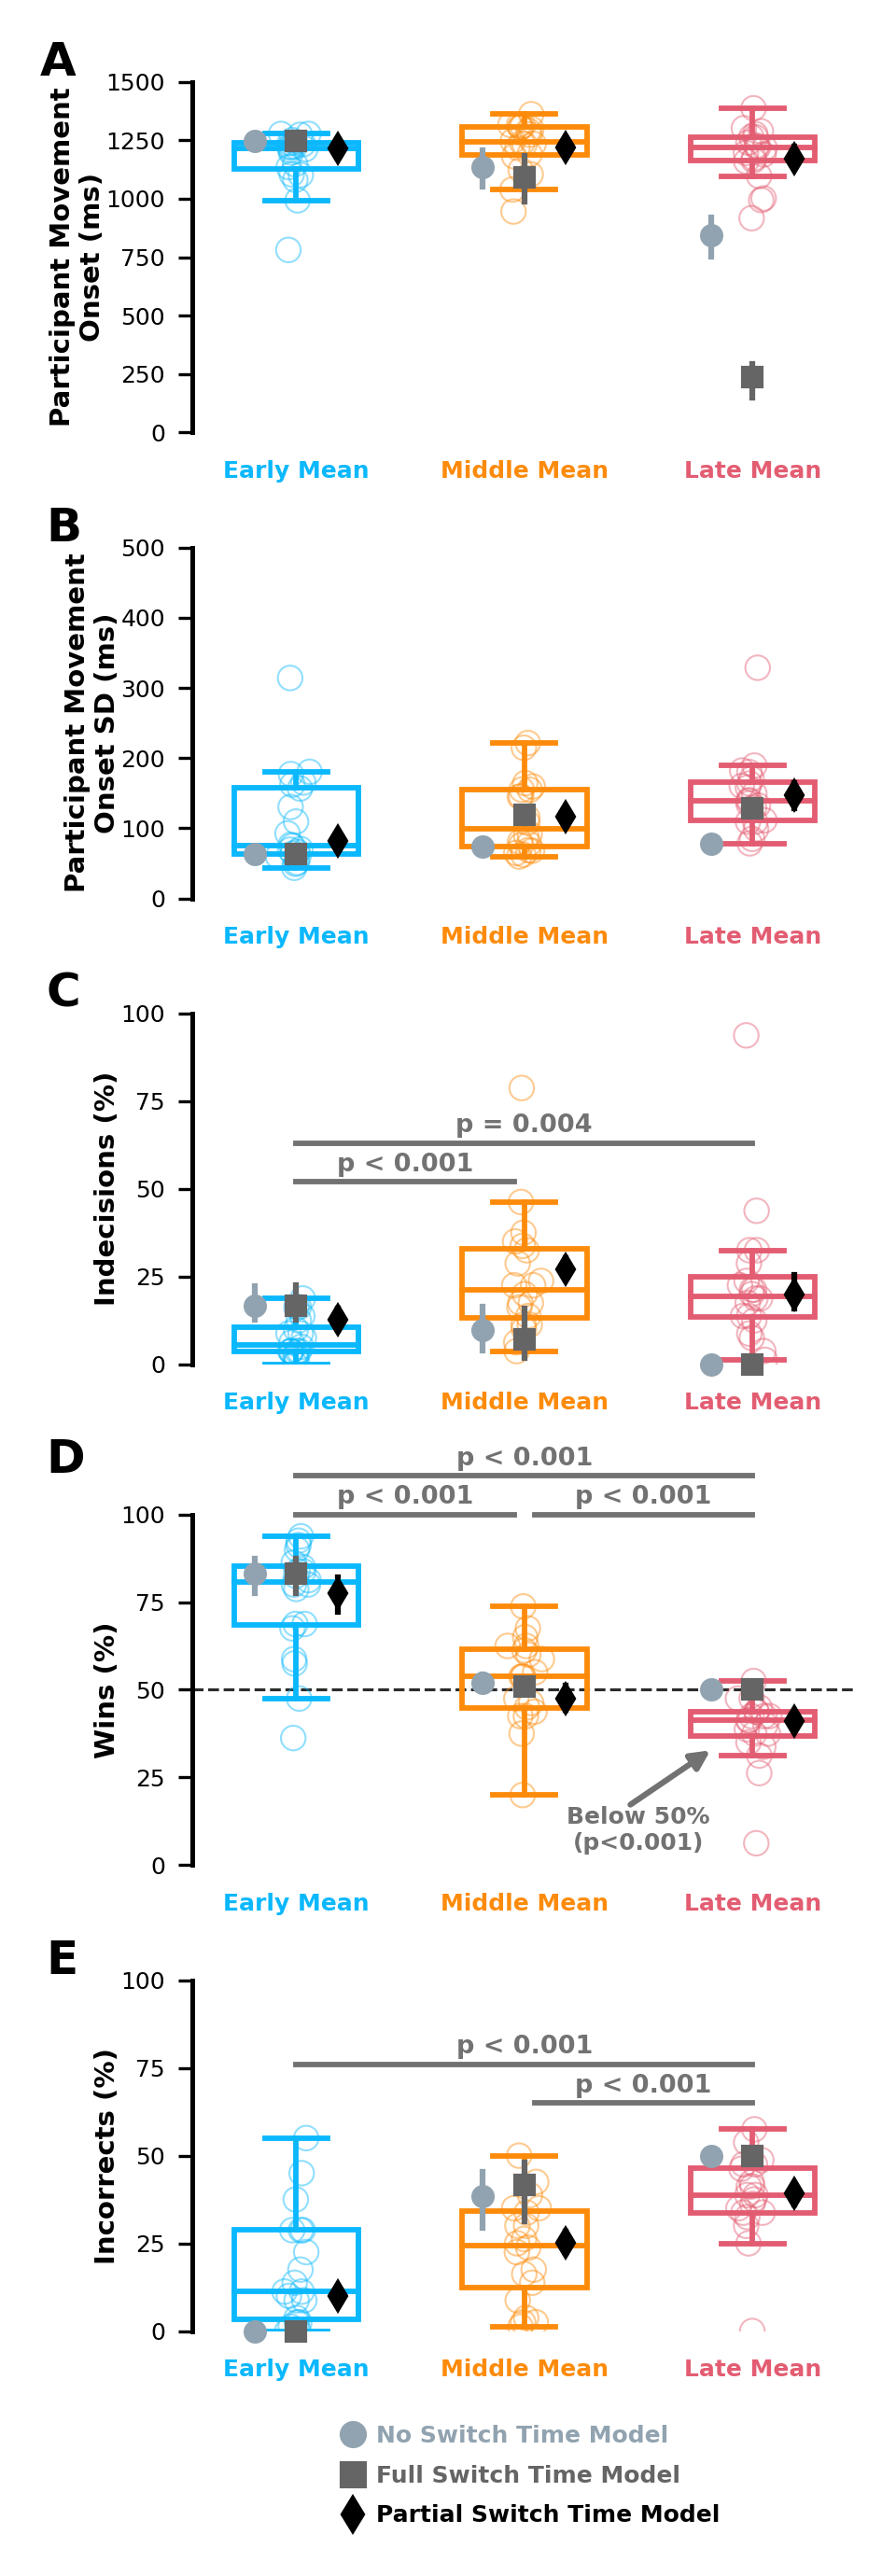

In [24]:

w, h = 3, 9
bw = 0.6  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(-0.2, 2, num=3)
legend_fontsize = 6.5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

ylabelpad = 0

metrics = np.array(
    [
        participant_mean_movement_onset_time,
        participant_sd_movement_onset_time,
        participant_perc_indecisions,
        participant_perc_wins,
        participant_perc_incorrects,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want

figure_pvals = [
    exp1_pvals_df.query("Metric == 'Mean_Movement_Onset_Time'"),
    exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
    exp1_pvals_df.query("Metric == 'Indecisions'"),
    exp1_pvals_df.query("Metric == 'Wins'"),
    exp1_pvals_df.query("Metric == 'Incorrects'"), 
]
figure_cles = [
    exp1_cles_df.query("Metric == 'Mean_Movement_Onset_Time'"),
    exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
    exp1_cles_df.query("Metric == 'Indecisions'"),
    exp1_cles_df.query("Metric == 'Wins'"),
    exp1_cles_df.query("Metric == 'Incorrects'"), 
]

stat_ypos = [ 
    [],
    [],
    [52,52,63],
    [100,100,111],
    [65,65,76],
]
stat_heights = [0, 0, 1.5, 1.5, 1.5]

ylocs = (
    [np.arange(0, 1501, 250)] + [np.arange(0, 501, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset (ms)",
    "Participant Movement\nOnset SD (ms)",
    "Indecisions (%)",
    "Wins (%)",
    "Incorrects (%)",
]
ylims = [(0, 1500)] + [(0, 500)] + [(0, 100)] * 3
model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
marker_styles = ["o","s","d"]
legend_locs = (0.58, 0.86)

#* Create Figure
mosaic = np.array([["a","b","c","d","e","leg"]]).T
fig = pf.NewFigure(mosaic=mosaic, dpi=300, figsize=(w, h),wspace=0, hspace=0, 
                   height_ratios=[1,1,1,1,1,0.1])
axs = list(fig.axes.values())

# * Looping axes for each metric
i = -1
for letter,ax in fig.axes.items():
    if letter=="leg":
        continue
    i+=1
    # Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
            include_mean =False,
            noise_scale=0.03,
            jitter_data=True,
            data_alpha = 0.45,
        )
        # Plot models
        for k, (model_medians, model_intervals) in enumerate(zip(median_dicts, interval_dicts)):
            if k == 0:
                shift = -bw / 3
            elif k == 2:
                shift = +bw / 3
            else:
                shift=0
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_names[i]][j],
                percentiles=model_intervals[col_names[i]][:, j],
                horizontal_lw=0,
                markersize=5,
                color=constants.model_colors[k],
                markerstyle=marker_styles[k],
            )
    if i == 3:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
        
    ax.set_ylim(ylims[i])
    # ax.set_xlim(min(xlocs) - 0.22, max(xlocs) + 0.22)
    ax.set_xticks(xlocs, labels=constants.xticklabels_only_mean, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    # ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means[:3],ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks 

#* Plot Stats
pf.plot_stats_v2(
                fig.axes['c'],
                pvals=exp1_pvals_df.query("Metric == 'Indecisions'"),
                cles = exp1_cles_df.query("Metric == 'Indecisions'"),
                combos = ['02','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[0], xlocs[1]-0.05], 
                    [xlocs[0], xlocs[2]],
                ],
                ypos=[52,63],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
pf.plot_stats_v2(
                fig.axes['d'],
                pvals=exp1_pvals_df.query("Metric == 'Wins'"),
                cles = exp1_cles_df.query("Metric == 'Wins'"),
                combos = ['02','24','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[0], xlocs[1]-0.05], 
                    [xlocs[1]+0.05, xlocs[2]],
                    [xlocs[0], xlocs[2]],
                ],
                ypos= [100,100,111],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
pf.plot_stats_v2(
                fig.axes['e'],
                pvals=exp1_pvals_df.query("Metric == 'Incorrects'"),
                cles = exp1_cles_df.query("Metric == 'Incorrects'"),
                combos = ['24','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[1]+0.05, xlocs[2]],
                    [xlocs[0], xlocs[2]],
                ],
                ypos=[65,76],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
#* Below 50%
# fig.axes['d'].plot([xlocs[2]-0.35,xlocs[2]-0.35],[49.5,37],color=wheel.dark_grey)
fig.axes['d'].text(xlocs[2]-0.55, 10, "Below 50%\n(p<0.001)", fontsize=6, 
                   color=wheel.dark_grey, fontweight="bold", ha='center', va='center') 
trans = transforms.blended_transform_factory(
    fig.axes['d'].transAxes, 
    fig.axes['d'].transData
)
arrow = mpl.patches.FancyArrowPatch((0.65,16), (0.79,34),arrowstyle="-|>",mutation_scale=10,lw=1.5,
                                    transform=trans, 
                                    color=wheel.dark_grey, zorder=90)
fig.axes['d'].add_patch(arrow)

#* Legend
leg=legend(fig.axes['leg'], labels=constants.model_names, colors=constants.model_colors, 
              loc="upper center", bbox_to_anchor = [0.5,1.005], ncol=1, fontsize=6, columnspacing=0.5, 
              handlestyle=['o','s','d'],labelspacing=0.75, handletextpad=0)
fig.axes['leg'].axis("off")
#* Add Letters
# fig.add_all_letters(verticalshift=0.35, horizontalshift=-0.6)
fig.add_letter(fig.axes['a'],-0.23, 1.12)
fig.add_letter(fig.axes['b'],-0.22, 1.12)
fig.add_letter(fig.axes['c'],-0.22, 1.12)
fig.add_letter(fig.axes['d'],-0.22, 1.22)
fig.add_letter(fig.axes['e'],-0.22, 1.12)

# fig.adjust_position(fig.axes['a'], (0,-0.13))
# fig.adjust_position(fig.axes['b'], (0,-0.13/2))
# shift = -0.14
# for ax_label in ["a","b","c", "d"]:
#     if ax_label in ["b","d"]:
#         fig.adjust_position(fig.axes[ax_label], (shift, 0)) # Shift the b and d plots to the left a bit
#     fig.adjust_size(fig.axes[ax_label], (abs(shift), 0)) # Make the figures all a bit wider

# plt.show()
fig.savefig(SAVE_PATH / "exp1_data_panel_with_models.png",transparent=True)

# Supplementary

## Guess Decisions


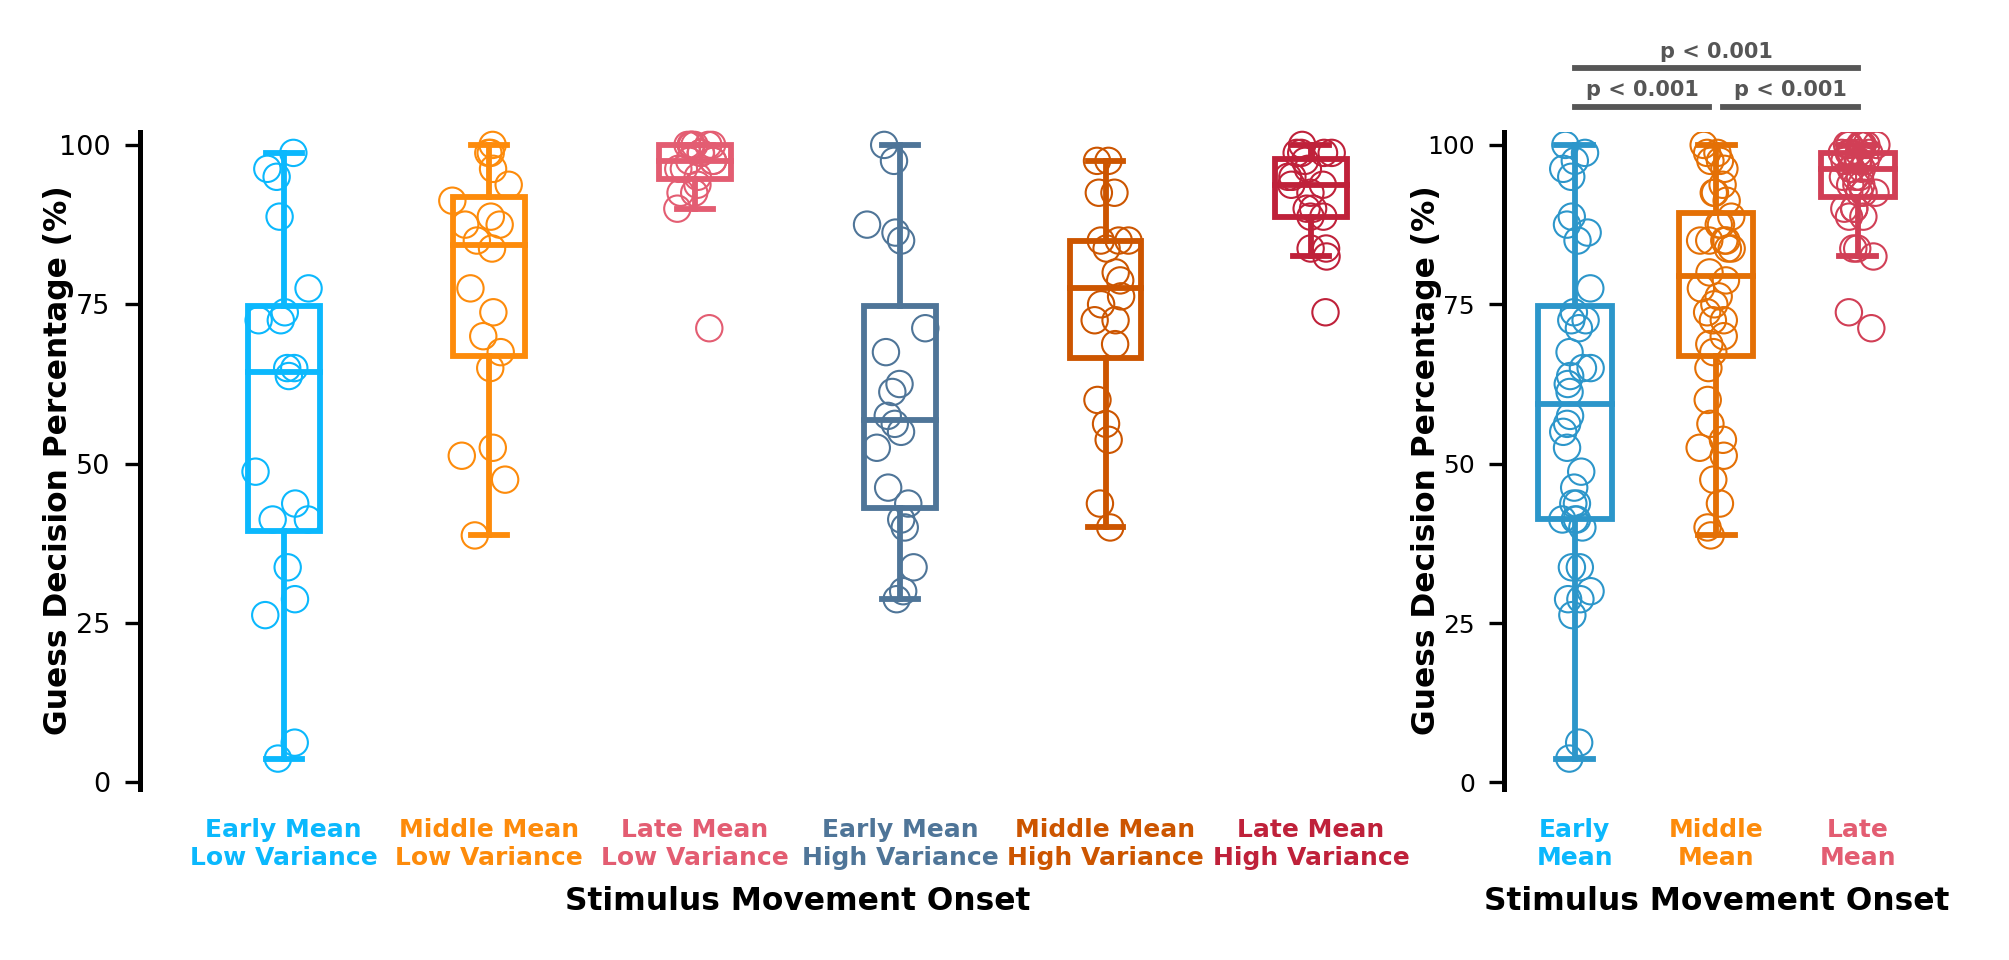

In [25]:
temp = trial_df.groupby(by=["Subject","Condition"]).agg({"reaction_decision":"sum",
                                                   "guess_decision":"sum",}).reset_index()
react_decisions = temp.pivot(values="reaction_decision", index="Subject", columns="Condition").to_numpy()[:,[0,2,4,1,3,5]]
perc_react_decisions = (react_decisions/it.num_trials)*100
guess_decisions = temp.pivot(values="guess_decision", index="Subject", columns="Condition").to_numpy()[:,[0,2,4,1,3,5]]
perc_guess_decisions = (guess_decisions/it.num_trials)*100
collapsed_perc_guess_decisions = np.array((
                                    np.hstack((perc_guess_decisions[:,0],perc_guess_decisions[:,3])),
                                    np.hstack((perc_guess_decisions[:,1],perc_guess_decisions[:,4])),
                                    np.hstack((perc_guess_decisions[:,2],perc_guess_decisions[:,5])),
                                ))  
fig = pf.NewFigure("ab", figsize=(6.5,3), dpi=300, width_ratios=[1,0.3])
xlocs = np.arange(0,6,1)
ylocs = np.arange(0,101,25)
ax = fig.axes['a']
bw=0.35
# Plot all boxes
for i in range(6):
    # Plot reactions
    # dv.boxplot(
    #     ax, xlocs[i] - 0.55*bw, perc_react_decisions[:,i],
    #     color=wheel.rak_red, box_lw=1.4, box_width = bw,
    #     clip_on=False, jitter_data=True,
    # )
    # Plot guesses
    dv.boxplot(
        ax, xlocs[i], perc_guess_decisions[:,i],
        color=constants.xticklabel_colors_means[i], 
        data_color = constants.xticklabel_colors_means[i],
        box_lw=1.4, box_width = bw,
        clip_on=False, jitter_data=True,
    )
    
# Plot follow up mean comparisons across means
small_xlocs = np.linspace(1.5,3.5,num=3)
for j in range(len(small_xlocs)):
        dv.boxplot(
            fig.axes['b'],
            small_xlocs[j],
            collapsed_perc_guess_decisions[j,:],
            color=constants.collapse_colors[j],
            data_color=constants.collapse_colors[j],
            box_lw=1.4, box_width = bw*1.5, jitter_data=True
        )

figure_pvals = exp1_pvals_df.query("Metric == 'Guess_Decisions'")
figure_cles = exp1_cles_df.query("Metric == 'Guess_Decisions'")    
    
pf.plot_stats_v2(
        fig.axes['b'],
        pvals=figure_pvals,
        cles = figure_cles,
        combos = ['01','12','02'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50,
        xlocs = [[small_xlocs[0],small_xlocs[1]-0.05], 
                 [small_xlocs[1]+0.05, small_xlocs[2]],
                 [small_xlocs[0],small_xlocs[2]]],
        ypos=[106,106,112],
        stacked=True,
        show_effectsize=False,
        lw = 1.4, 
        h = 1,
        fontsize=5,
        shorten_length=True,
        color = wheel.lighten_color(wheel.dark_grey,1.2),
    )
fig.axes['b'].set_xticks(small_xlocs, labels=["Early\nMean", "Middle\nMean", "Late\nMean"], fontsize=6)
fig.axes['b'].set_yticks(ylocs, labels = ylocs, fontsize=yticklabel_fontsize)
fig.axes['b'].set_ylim(-1,102)
fig.axes['b'].set_ylabel("Guess Decision Percentage (%)", fontsize=7.5, labelpad=-3.5)
fig.axes['b'].set_xlabel(it.xlabel, fontsize=7.5)
fig.axes['b'].spines['bottom'].set_visible(False)
fig.axes['b'].tick_params(bottom=False)  # remove the ticks    


# fig.axes['b'].set_xlim(min(xlocs) - 0.1, max(xlocs) + 0.1)

fig.axes['a'].set_alpha(0)

fig.axes['a'].set_xlabel(it.xlabel, fontsize=7.5)
fig.axes['a'].set_ylabel("Guess Decision Percentage (%)", fontsize=7.5, labelpad=-3.5)
fig.axes['a'].set_yticks(ylocs, labels=ylocs, fontsize=6.5)
fig.axes['a'].set_ylim(-1,102)
fig.axes['a'].spines['bottom'].set_visible(False)
fig.axes['a'].tick_params(bottom=False)  # remove the ticks    

fig.axes['a'].set_xlim(min(xlocs) - 2*bw, max(xlocs) + 2*bw)
fig.axes['a'].set_xticks(xlocs, labels=constants.xticklabels, fontsize=6, color=wheel.lighten_color(wheel.dark_grey,1.35))

for ax in fig.axes.values():
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
# ax.set_title("Reaction and Guess Decisions", fontsize=9)
# dv.custom_legend(fig.axes['a'], labels = ["Reaction", "Guess"], 
#                  colors=[wheel.rak_red, wheel.rak_blue],
#                  loc = "center", bbox_to_anchor=[0.5,1.08], 
#                  ncols=2, columnspacing=2, 
#                  fontsize=8)
fig.adjust_size(fig.axes['b'], (0.1,0))
fig.adjust_position(fig.axes['b'],(-0.23,0))
# plt.show()
fig.savefig(SAVE_PATH / "guess_decisions.png")

In [26]:
model_results[2]

,Model,Loss,fit_parameters,decision_times,target_reach_times,target_reach_times_sd,target_reach_times_guess,target_reach_times_guess_sd,target_reach_times_react,target_reach_times_react_sd,prob_selecting_guess,prob_selecting_reaction,mean_movement_onset_time,sd_movement_onset_time,indecisions,wins,incorrects,num_parameters,mean_movement_onset_time_mse_loss,sd_movement_onset_time_mse_loss,indecisions_mse_loss,wins_mse_loss,incorrects_mse_loss,mean_movement_onset_time_bic,mean_movement_onset_time_aic,sd_movement_onset_time_bic,sd_movement_onset_time_aic,indecisions_bic,indecisions_aic,wins_bic,wins_aic,incorrects_bic,incorrects_aic
0,suboptimal_partial_model0_2024_07_18_08_31_08,2.644603,"[guess_switch_delay_true, guess_switch_delay_e...","[[1274.0, 1072.0, 1016.0, 1035.0, 63.0, 962.0]...","[1386.064041459611, 1330.372013053478, 1387.89...","[79.80817666825843, 128.78597707859174, 110.23...","[1303.3165331022608, 1304.3165331022608, 1314....","[[145.3881955159028, 145.3881955159028, 145.38...","[1406.4752683145189, 1343.146195158665, 1489.2...","[63.63163348984979, 120.64643169062066, 61.806...","[0.19786232172108373, 0.3289799969577658, 0.57...","[0.8021376782789161, 0.6710200030422342, 0.420...","[1210.2004799130352, 1154.5084515069025, 1212....","[75.43236339109784, 126.39956732058496, 106.88...","[11.146768857244341, 14.393712868180424, 24.49...","[79.8312753681566, 70.77095836550748, 49.44750...","[9.021955774599059, 14.8353287663121, 26.05350...",12,16035.218096,3229.403520,260.643555,3678.035328,683.668691,55.313873,43.365085,52.108893,40.160105,47.075095,35.126308,52.369055,40.420268,49.003734,37.054947
1,suboptimal_partial_model1_2024_07_18_08_31_36,2.560915,"[guess_switch_delay_true, guess_switch_delay_e...","[[1353.0, 1075.0, 0.0, 1023.0, 0.0, 917.0], [1...","[1385.270335867782, 1332.7366004584983, 1390.2...","[87.36743447394444, 136.32650126184603, 121.65...","[1305.6001065589794, 1307.6001065589794, 1316....","[[162.6598986718865, 162.6598986718865, 162.65...","[1408.0058875805237, 1345.3711086484723, 1492....","[65.88116879850548, 123.09038621028077, 64.504...","[0.22201433831121964, 0.3345028590991168, 0.58...","[0.7779856616887804, 0.6654971409008832, 0.417...","[1208.359104277642, 1155.8253688683585, 1213.3...","[82.32436881147697, 133.55541181160189, 117.84...","[12.467595633859698, 15.827249119939832, 26.93...","[77.71956952228264, 69.57320657707766, 47.7253...","[9.812834843857656, 14.599544302982503, 25.336...",12,15970.800533,3036.403221,339.493858,3481.559344,639.547720,55.305822,43.357035,51.985645,40.036858,47.603699,35.654912,52.259258,40.310471,48.870310,36.921522
2,suboptimal_partial_model2_2024_07_18_08_32_01,2.522462,"[guess_switch_delay_true, guess_switch_delay_e...","[[1401.0, 1090.0, 1055.0, 1037.0, 17.0, 937.0]...","[1384.401098987245, 1336.0301002566048, 1411.8...","[79.48439444577619, 131.78733056165044, 108.27...","[1335.4675800220066, 1336.4675800220066, 1347....","[[150.8252151252368, 150.8252151252368, 150.82...","[1394.9236038467438, 1335.8368350690876, 1480....","[64.1434962607604, 123.37697510958624, 62.6171...","[0.17697962599242756, 0.3064078224056893, 0.51...","[0.8230203740075724, 0.6935921775943107, 0.482...","[1223.0367299464756, 1174.6657312158354, 1250....","[75.52577108529783, 129.67599300376423, 105.14...","[10.095337137308258, 15.745579334333492, 27.44...","[82.2738547959732, 71.19495883040553, 50.70577...","[7.630808066718539, 13.05946183526098, 21.8446...",12,16886.513712,3184.102232,371.889829,3690.798276,543.705787,55.417328,43.468541,52.080639,40.131851,47.785983,35.837195,52.375983,40.427196,48.545604,36.596817
3,suboptimal_partial_model3_2024_07_18_08_32_37,2.685773,"[guess_switch_delay_true, guess_switch_delay_e...","[[1384.0, 1072.0, 0.0, 1010.0, 0.0, 884.0], [1...","[1390.8161681034799, 1340.8002263754033, 1404....","[85.90080959703067, 134.9500479314172, 119.261...","[1329.215238879378, 1330.215238879378, 1340.21...","[[159.66167496875818, 159.66167496875818, 159..

## Model Loss Distributions

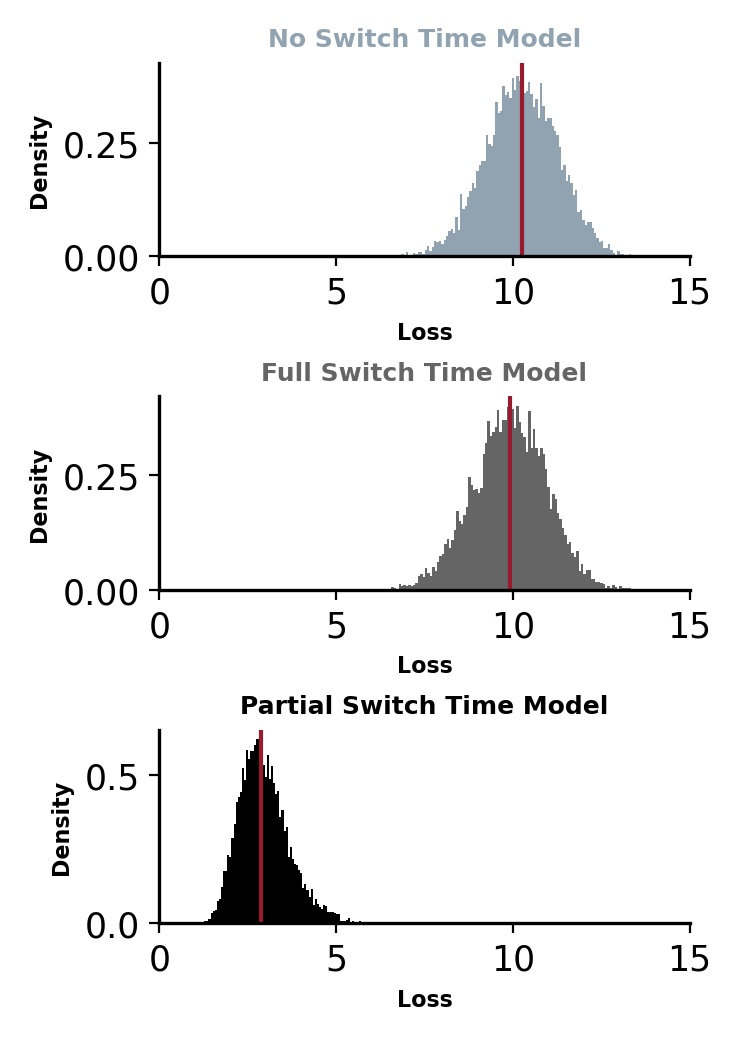

In [27]:
loss = []
for i in range(len(model_results)):
    temp = np.stack(model_results[i]["Loss"].to_numpy())
    temp = np.where(temp==1000000.0, np.nan, temp)
    loss.append(temp)

fig = pf.NewFigure("a;b;c",figsize = (3.5,5),dpi=200)
xlims = [(0,15),(0,15),(0,15)]
for i,ax in enumerate(fig.axes.values()):
    ax.hist(loss[i],align='mid',bins=100,
            density=True, color=constants.model_colors[i])
    ax.axvline(np.nanmedian(loss[i]), color=wheel.lighten_color(wheel.rak_red,1.75))
    ax.set_title(constants.model_names[i], fontsize=9, color=constants.model_colors[i])
    ax.set_xlim(xlims[i])
    # ax.set_xticks(np.arange(0,16.0,2.5))
    # ax.set_xticklabels(np.arange(0,16.0,2.5),fontsize=7)
    # ax.set_ylim(0,0.75)
    # ax.set_yticks(np.arange(0,0.756,0.25))
    # ax.set_yticklabels(["0.0","0.25","0.50","0.75"], fontsize=7)
    
    ax.set_xlabel('Loss', fontsize=8)
    ax.set_ylabel("Density", fontsize=8)
    # fig.remove_figure_borders()
    
# plt.show()
fig.savefig(SAVE_PATH / "model_losses.png")

## Model Parameter Medians and SDs

In [28]:
np.nanmedian(np.stack(model_inputs[2]['timing_sd'].to_numpy())[:,0])

77.74890526184421

In [29]:
models = ["No Switch Time Model", "Known Switch Time Model","Unknown Switch Time Model"]
for i in range(len(models)):
    print("Model: "+models[i])
    mean_timing_sd_true = np.nanmean(np.stack(model_inputs[i]['timing_sd'].to_numpy())[:,0])
    mean_timing_sd_expected = np.nanmean(np.stack(model_inputs[i]['timing_sd'].to_numpy())[:,1])
    sd_timing_sd_true = np.nanstd(np.stack(model_inputs[i]['timing_sd'].to_numpy())[:,0])
    sd_timing_sd_expected = np.nanstd(np.stack(model_inputs[i]['timing_sd'].to_numpy())[:,1])
    print(f"Mean Timing SD True: {mean_timing_sd_true}")
    print(f"Mean Timing SD Expected: {mean_timing_sd_expected}")
    print(f"SD Timing SD True: {mean_timing_sd_true}")
    print(f"SD Timing SD Expected: {mean_timing_sd_expected}")
    print("")
    mean_switch_time_mean_true     = np.nanmean(np.stack(model_inputs[i]['guess_switch_delay'].to_numpy())[:,0])
    mean_switch_time_mean_expected = np.nanmean(np.stack(model_inputs[i]['guess_switch_delay'].to_numpy())[:,1])
    sd_switch_time_mean_true         = np.nanstd(np.stack(model_inputs[i]['guess_switch_delay'].to_numpy())[:,0])
    sd_switch_time_mean_expected     = np.nanstd(np.stack(model_inputs[i]['guess_switch_delay'].to_numpy())[:,1])
    print(f"Mean Switch Time Mean True: {mean_switch_time_mean_true}")
    print(f"Mean Switch Time Mean Expected: {mean_switch_time_mean_expected}")
    print(f"SD Switch Time Mean True: {sd_switch_time_mean_true}")
    print(f"SD Switch Time Mean Expected: {sd_switch_time_mean_expected}")
    print("")
    mean_switch_time_sd_true     = np.nanmean(np.stack(model_inputs[i]['guess_switch_sd'].to_numpy())[:,0])
    mean_switch_time_sd_expected = np.nanmean(np.stack(model_inputs[i]['guess_switch_sd'].to_numpy())[:,1])
    sd_switch_time_sd_true         = np.nanstd(np.stack(model_inputs[i]['guess_switch_sd'].to_numpy())[:,0])
    sd_switch_time_sd_expected     = np.nanstd(np.stack(model_inputs[i]['guess_switch_sd'].to_numpy())[:,1])
    print(f"Mean Switch Time SD True: {mean_switch_time_sd_true}")
    print(f"Mean Switch Time SD Expected: {mean_switch_time_sd_expected}")
    print(f"SD Switch Time SD True: {sd_switch_time_sd_true}")
    print(f"SD Switch Time SD Expected: {sd_switch_time_sd_expected}")
    print(" ")
    print("-------------------------------")

Model: No Switch Time Model
Mean Timing SD True: 77.82831534662013
Mean Timing SD Expected: 77.82831534662013
SD Timing SD True: 77.82831534662013
SD Timing SD Expected: 77.82831534662013

Mean Switch Time Mean True: 0.0
Mean Switch Time Mean Expected: 0.0
SD Switch Time Mean True: 0.0
SD Switch Time Mean Expected: 0.0

Mean Switch Time SD True: 0.0
Mean Switch Time SD Expected: 0.0
SD Switch Time SD True: 0.0
SD Switch Time SD Expected: 0.0
 
-------------------------------
Model: Known Switch Time Model
Mean Timing SD True: 77.82831534662013
Mean Timing SD Expected: 77.82831534662013
SD Timing SD True: 77.82831534662013
SD Timing SD Expected: 77.82831534662013

Mean Switch Time Mean True: 0.9540323134225699
Mean Switch Time Mean Expected: 0.9540323134225699
SD Switch Time Mean True: 1.1602589010713473
SD Switch Time Mean Expected: 1.1602589010713473

Mean Switch Time SD True: 103.20244266350272
Mean Switch Time SD Expected: 103.20244266350272
SD Switch Time SD True: 6.533501184027458

In [30]:
column_names = ["reaction_time","reaction_sd","movement_time","movement_sd","timing_sd", "guess_switch_delay", "guess_switch_sd"]
for col in column_names:
    true_mean         = np.nanmean(np.stack(model_inputs[2][col].to_numpy())[:,0])
    true_upper_ci     = np.percentile(np.stack(model_inputs[2][col].to_numpy())[:,0],95.0)
    true_lower_ci     = np.percentile(np.stack(model_inputs[2][col].to_numpy())[:,0],5.0)
    expected_mean     = np.nanmean(np.stack(model_inputs[2][col].to_numpy())[:,1])
    expected_upper_ci = np.percentile(np.stack(model_inputs[2][col].to_numpy())[:,1],95.0)
    expected_lower_ci = np.percentile(np.stack(model_inputs[2][col].to_numpy())[:,1],5.0)
    
    print(col + f" true mean: {true_mean}")
    print(col + f" true 95%: {true_upper_ci}")
    print(col + f" true 5%: {true_lower_ci}")
    print(col + f" expected mean: {expected_mean}")
    print(col + f" expected 95%: {expected_upper_ci}")
    print(col + f" expected 5%: {expected_lower_ci}")
    
    

reaction_time true mean: 247.44709757142854
reaction_time true 95%: 256.3539999999999
reaction_time true 5%: 239.16975510204082
reaction_time expected mean: 247.44709757142854
reaction_time expected 95%: 256.3539999999999
reaction_time expected 5%: 239.16975510204082
reaction_sd true mean: 38.54625158513081
reaction_sd true 95%: 41.40934122556925
reaction_sd true 5%: 35.69695406555299
reaction_sd expected mean: 38.54625158513081
reaction_sd expected 95%: 41.40934122556925
reaction_sd expected 5%: 35.69695406555299
movement_time true mean: 171.74784861014066
movement_time true 95%: 187.22249348291473
movement_time true 5%: 157.58321162974684
movement_time expected mean: 171.74784861014066
movement_time expected 95%: 187.22249348291473
movement_time expected 5%: 157.58321162974684
movement_sd true mean: 25.364001145775212
movement_sd true 95%: 28.665707845224567
movement_sd true 5%: 22.161020262627943
movement_sd expected mean: 25.364001145775212
movement_sd expected 95%: 28.665707845224

## Model Parameter Plots

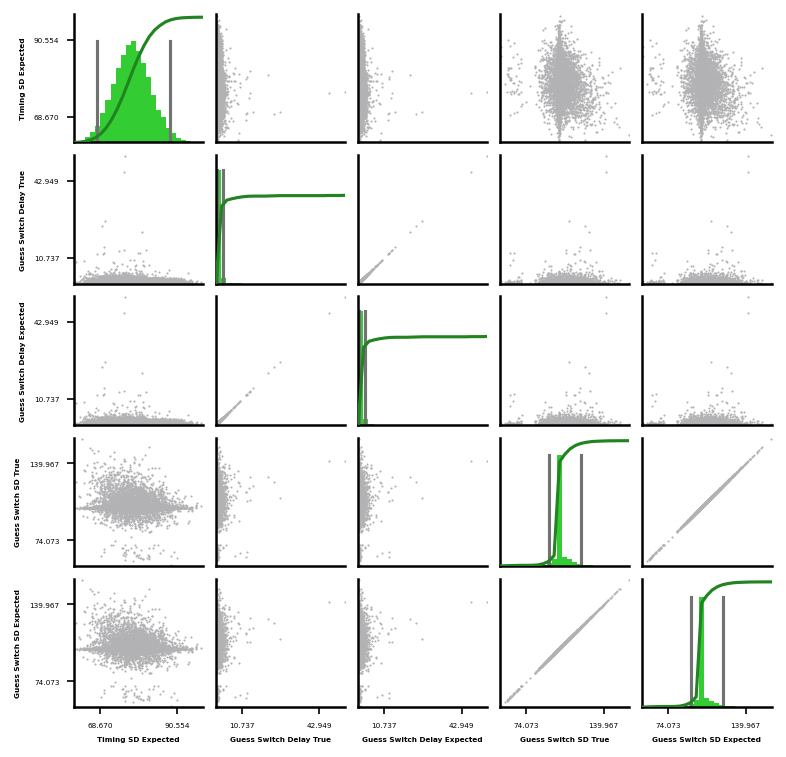

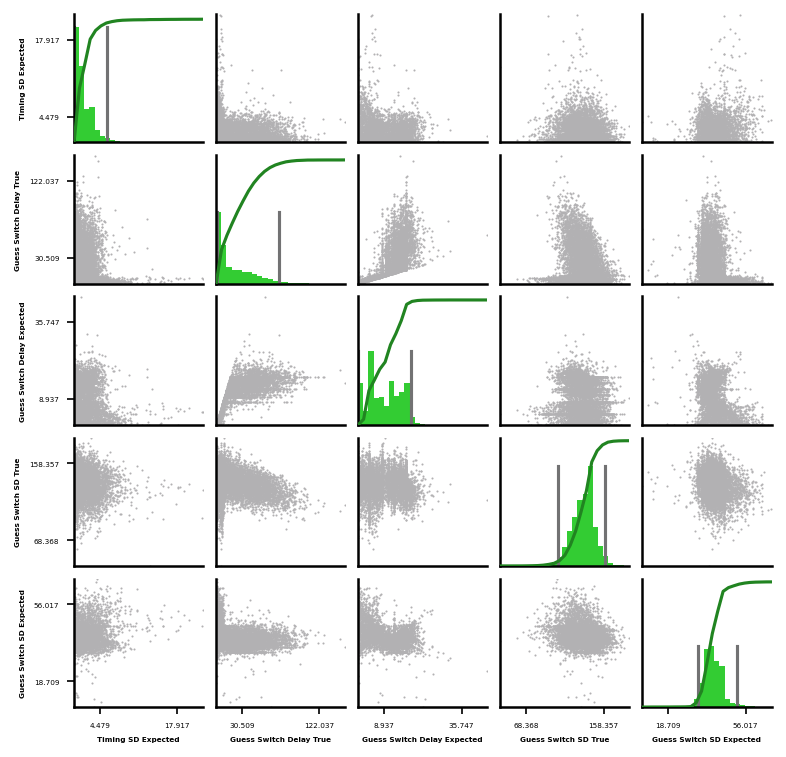

In [31]:
labels = ["Timing SD Expected", "Guess Switch Delay True", "Guess Switch Delay Expected",
          "Guess Switch SD True", "Guess Switch SD Expected"]
for i,model_df in enumerate(model_inputs[1:]):
    param_array = []
    # param_array.append(np.stack(model_df['timing_sd'].to_numpy())[:,0,0].squeeze())
    param_array.append(np.stack(model_df['timing_sd'].to_numpy())[:,1,0].squeeze())
    param_array.append(np.stack(model_df['guess_switch_delay'].to_numpy())[:,0,0].squeeze())
    param_array.append(np.stack(model_df['guess_switch_delay'].to_numpy())[:,1,0].squeeze())
    param_array.append(np.stack(model_df['guess_switch_sd'].to_numpy())[:,0,0].squeeze())
    param_array.append(np.stack(model_df['guess_switch_sd'].to_numpy())[:,1,0].squeeze())
    
    fig, axes = dv.Pair_Plot(np.array(param_array).T, labels, labelsize=3.5, dpi=150)    
    for axes_column in axes:
        [ax.tick_params(axis="both", which="major", labelsize=3.5) for ax in axes_column]

array([10.88633905,  8.07085088])

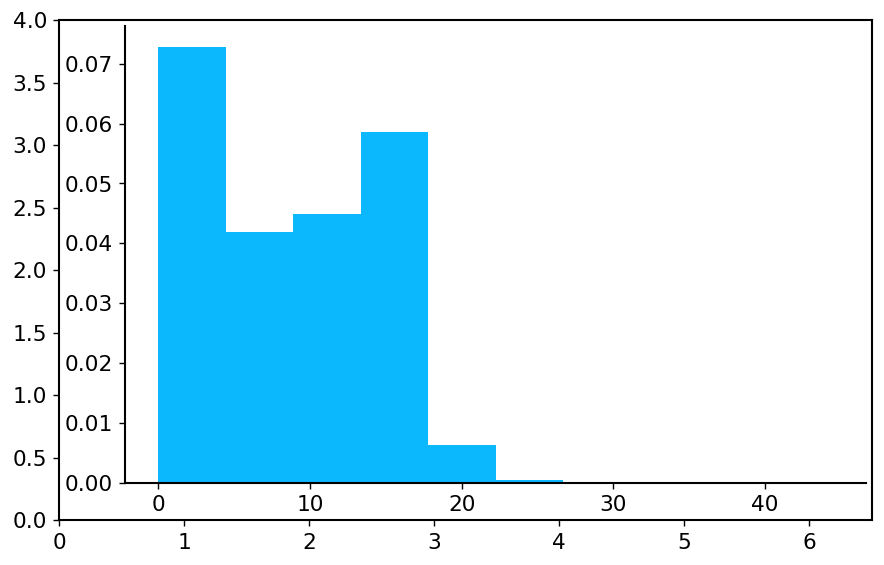

In [32]:
fig = dv.AutoFigure(mosaic='a',dpi=125)
fig.axes["a"].hist(np.stack(model_df['guess_switch_delay'].to_numpy()).squeeze()[:,1],density=True)
np.median(np.stack(model_df['guess_switch_delay'].to_numpy()).squeeze(),axis=0)

# Not Actually Supplementary but potentially useful

## First Half Second Half

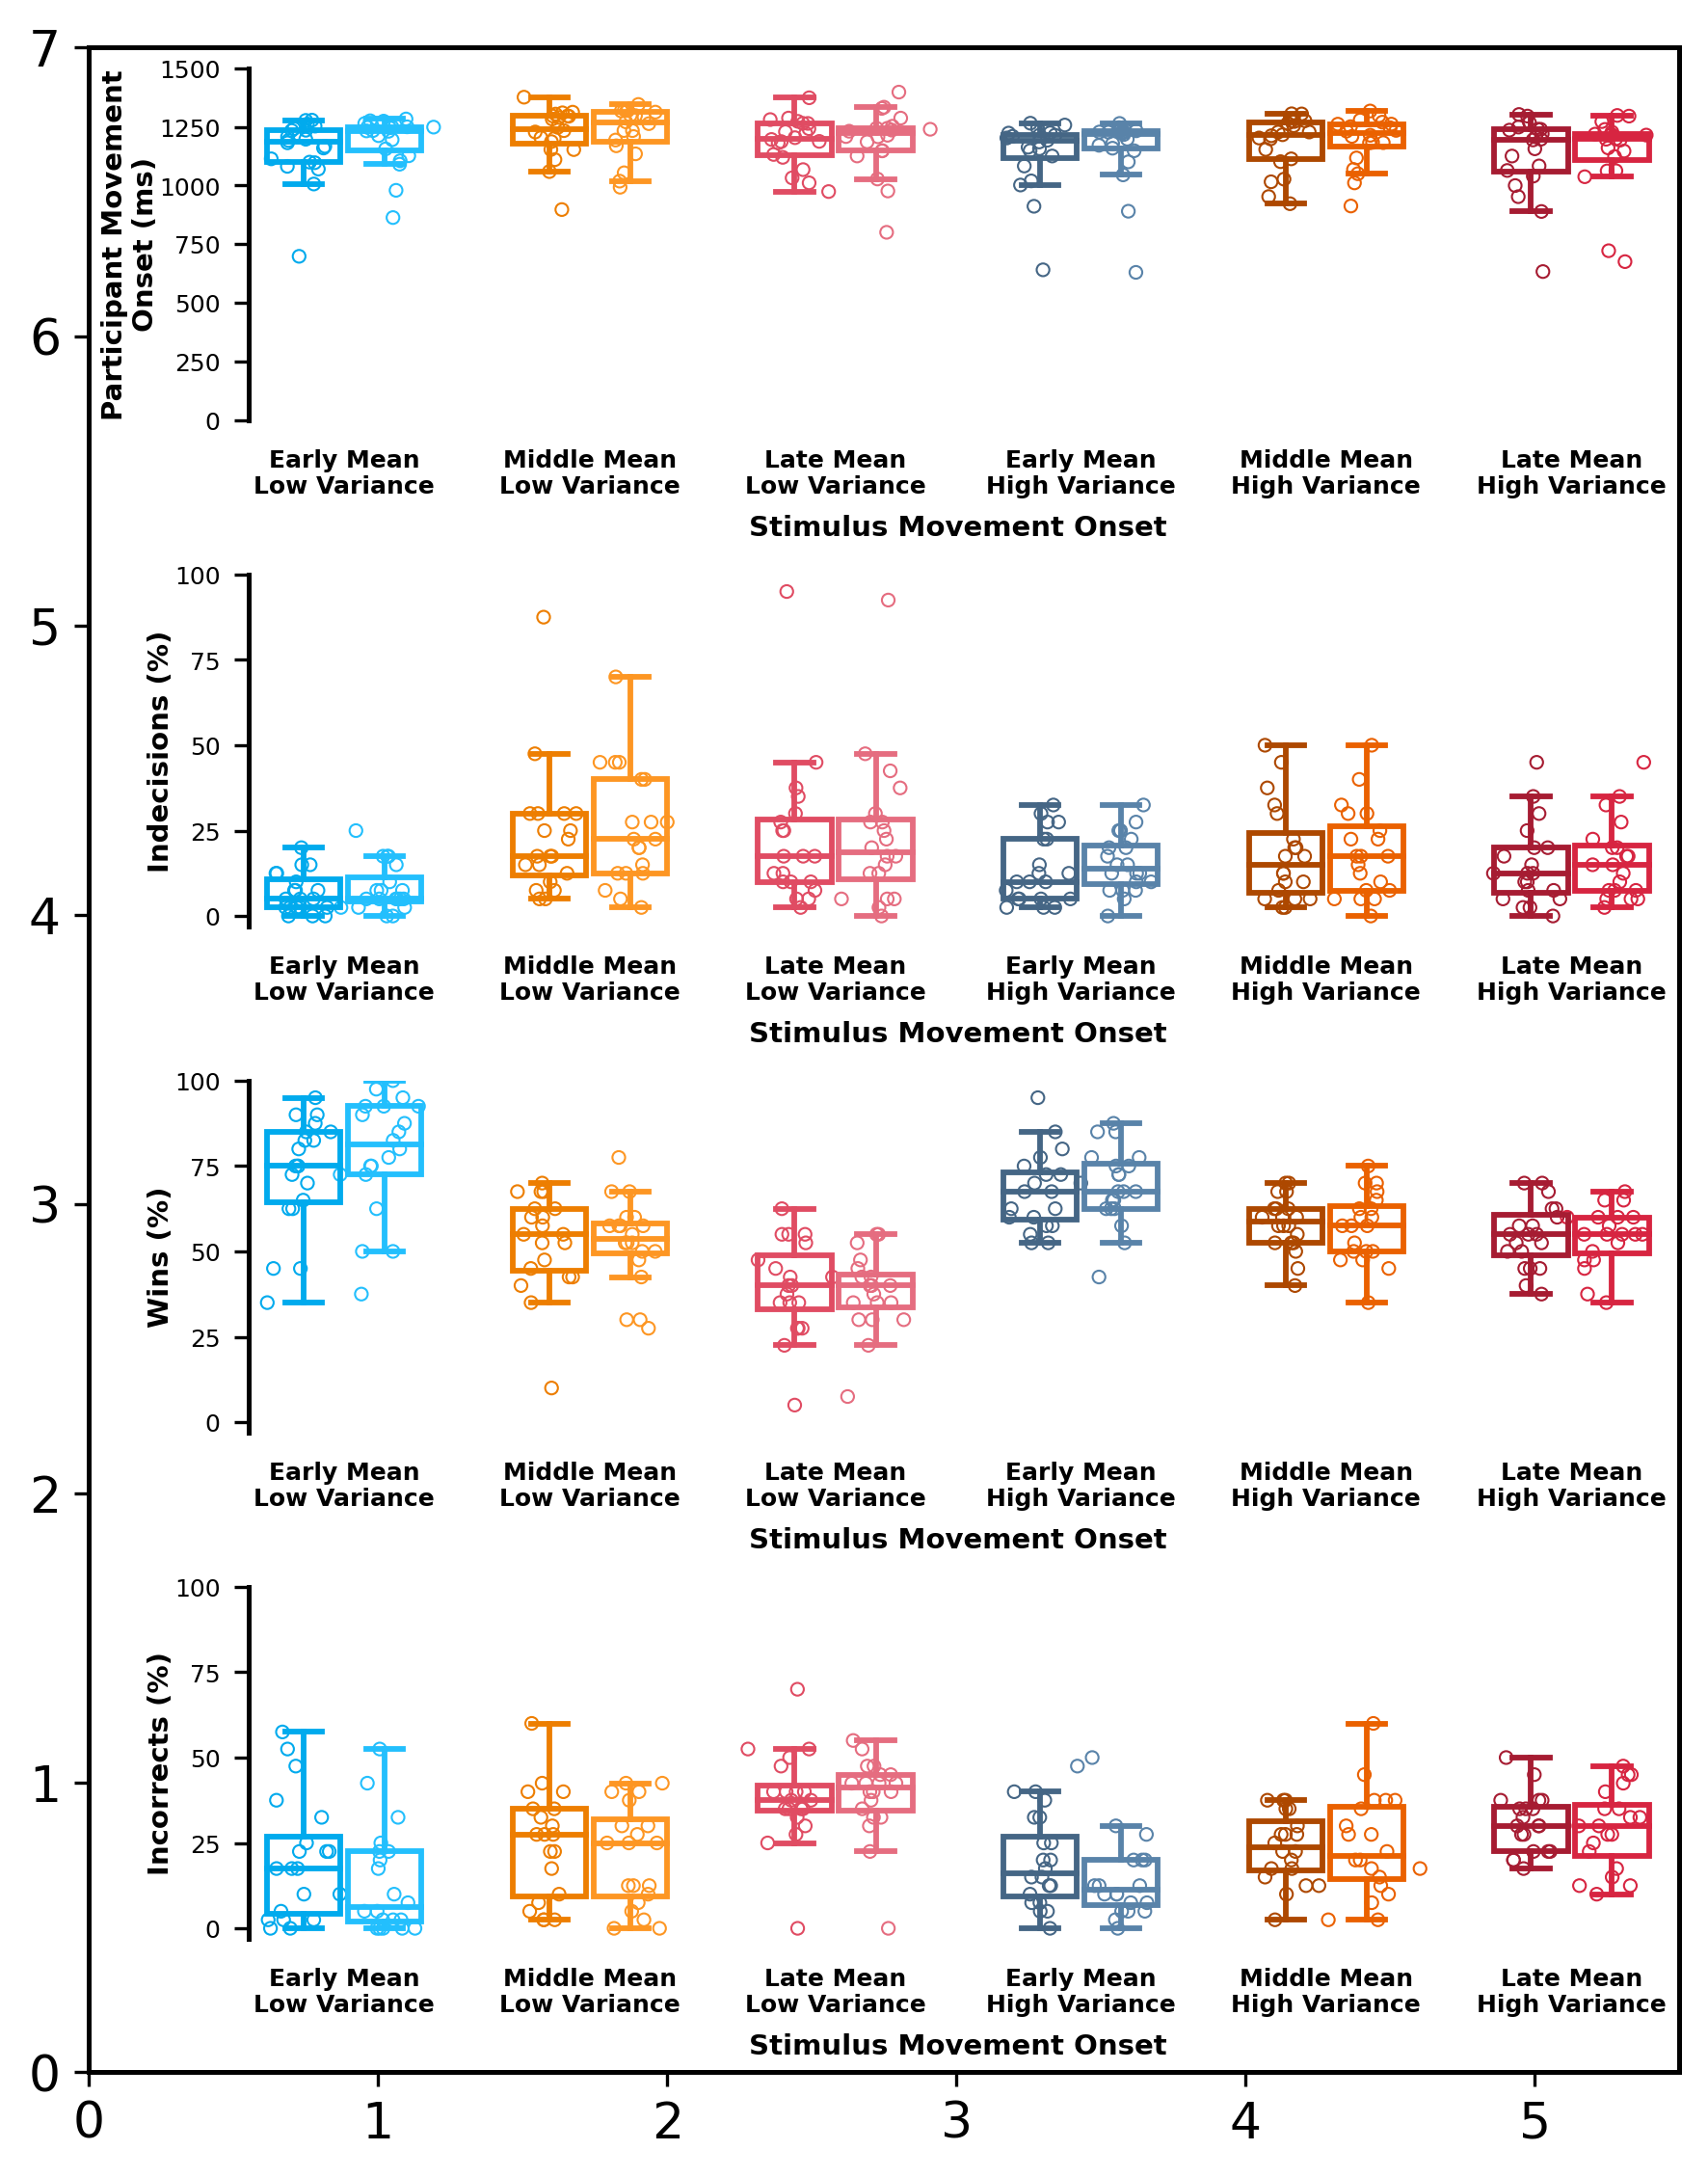

In [33]:
first_half_df  = trial_df[trial_df['Trial'].astype(int)<=40]
second_half_df = trial_df[trial_df['Trial'].astype(int)>40]
agg_dict = {"player_movement_onset_time":"mean",
                "indecision":"sum",
                "win":"sum",
                "incorrect":"sum"}
first_half_metrics_arr = hf.long_df_to_multiarray(
    first_half_df, 
    agg_dict = agg_dict,
)[:,:,[0,2,4,1,3,5]]
second_half_metrics_arr = hf.long_df_to_multiarray(
    second_half_df, 
    agg_dict = agg_dict,
)[:,:,[0,2,4,1,3,5]]

first_half_metrics_arr[1:,:,:] = (first_half_metrics_arr[1:,:,:]/40)*100
second_half_metrics_arr[1:,:,:] = (second_half_metrics_arr[1:,:,:]/40)*100

bw= 0.3

xlocs = np.arange(0,len(it.trial_block_titles), 1)
ylims = [(0, 1500)] + [(-3, 100)] * 3
ylocs = (
    [np.arange(0, 1501, 250)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset (ms)",
    "Indecisions (%)",
    "Wins (%)",
    "Incorrects (%)",
]
fig = pf.NewFigure("a;b;c;d",figsize=(5.5,7), dpi=300)

i = -1
for letter,ax in fig.axes.items():
    i+=1
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j]-0.55*bw,
            first_half_metrics_arr[i, :, j],
            color=wheel.lighten_color(constants.xticklabel_colors_means[j],1.1),
            jitter_data=True,
            box_lw=1.4,
            box_width = bw,
            data_size = 10,
        )
        dv.boxplot(
            ax,
            xlocs[j]+0.55*bw,
            second_half_metrics_arr[i, :, j],
            color=wheel.lighten_color(constants.xticklabel_colors_means[j],0.9),
            jitter_data= True,
            box_lw=1.4,
            box_width=bw,
            data_size=10,
        )
    ax.set_ylim(ylims[i])
    ax.set_ylim(ylims[i])
    ax.set_ylim(ylims[i])
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 1.3*bw, max(xlocs) + 1.3*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks 

## Mean vs Median (Not actually supplementary)

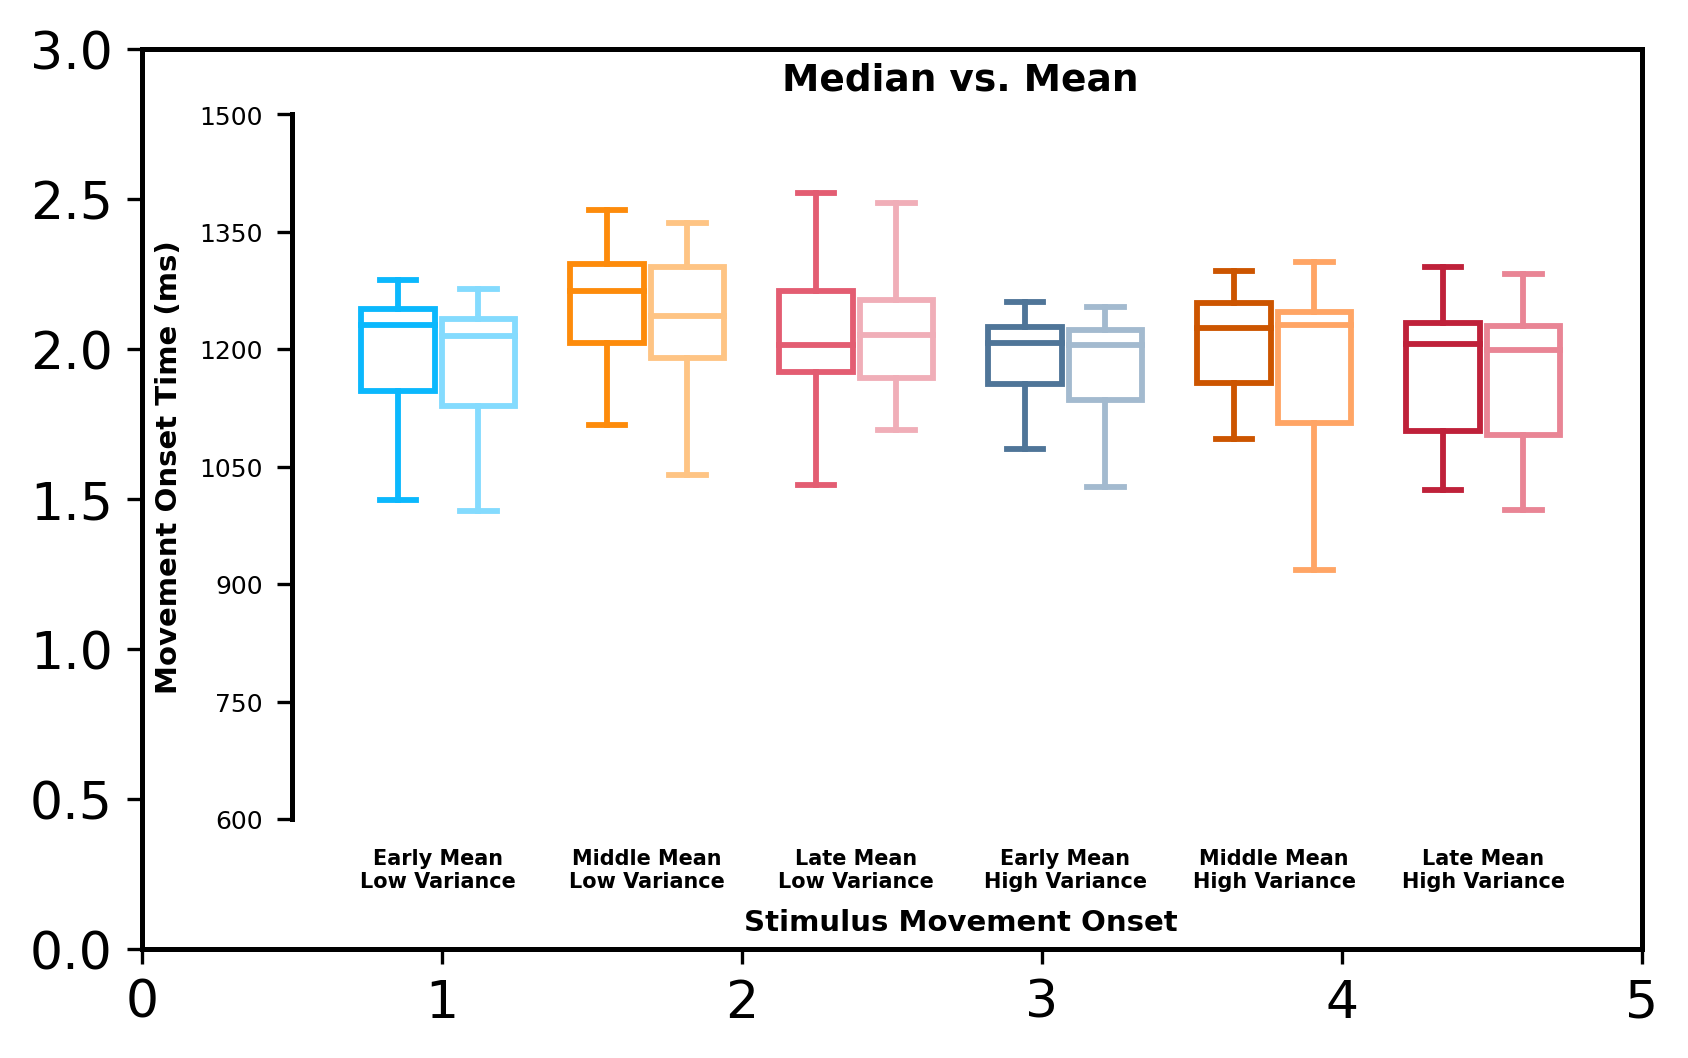

In [34]:
temp = trial_df.groupby(by=["Subject","Condition"]).agg({"player_movement_onset_time":"median"}).reset_index()
median_movement_onset_time = temp.pivot(values="player_movement_onset_time", index="Subject", columns="Condition").to_numpy()[:,[0,2,4,1,3,5]]
temp = trial_df.groupby(by=["Subject","Condition"]).agg({"player_movement_onset_time":"mean"}).reset_index()
mean_movement_onset_time = temp.pivot(values="player_movement_onset_time", index="Subject", columns="Condition").to_numpy()[:,[0,2,4,1,3,5]]

fig = pf.NewFigure("a", figsize=(5,3), dpi=300)
xlocs = np.arange(0,6,1)
ylocs = np.arange(600,1501,150)
ax = fig.axes['a']
bw=0.35
for i in range(6):
    dv.boxplot(
                ax,
                xlocs[i] - 0.55*bw,
                median_movement_onset_time[:,i],
                color=constants.xticklabel_colors_means[i],
                data_color=constants.xticklabel_colors_means[i],
                box_lw=1.4, 
                box_width = bw,
            )
# dv.jitter_array(ax=ax,x_positions=xlocs-bw,data=mean_movement_onset_time.T,
#                 data_color = constants.collapse_colors,
#                 data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
#                 noise_scale=0.06, include_mean = False, circle_size=markersize)
for i in range(6):
    dv.boxplot(
                ax,
                xlocs[i] + 0.55*bw,
                mean_movement_onset_time[:,i],
                color=wheel.lighten_color(constants.xticklabel_colors_means[i],0.5),
                data_color=constants.xticklabel_colors_means[i],
                box_lw=1.4, 
                box_width = bw,
            )
# dv.jitter_array(ax=ax,x_positions=xlocs+bw,data=median_movement_onset_time.T,
#                 data_color = constants.collapse_colors,
#                 data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
#                 noise_scale=0.06, include_mean = False, circle_size=markersize)


ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=xticklabel_fontsize)
ax.set_yticks(ylocs, labels=ylocs, fontsize=yticklabel_fontsize)
ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
ax.set_ylim(600,1500)
ax.set_xlim(min(xlocs) - 2*bw, max(xlocs) + 2*bw)
ax.set_ylabel("Movement Onset Time (ms)", fontsize=label_fontsize)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False)  # remove the ticks    

# [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
[ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
ax.set_title("Median vs. Mean", fontsize=9)
plt.show()

## Guess Movement Onset Time SD versus Timing Uncertainty SD

In [35]:
react_df = trial_df[trial_df['reaction_decision']]
guess_df = trial_df[trial_df['guess_decision']]
temp = react_df.groupby(by=["Subject","Condition"]).agg({"player_movement_onset_time":"median"}).reset_index()
react_sd_movement_onset_time = temp.pivot_table(values="player_movement_onset_time", 
                                              index="Subject", 
                                              columns="Condition",
                                              sort=False).to_numpy()[:,[0,2,4,1,3,5]]
temp = guess_df.groupby(by=["Subject"]).agg({"player_movement_onset_time":"std",
                                            "timing_uncertainty":"mean"}).reset_index()
# pivot_table = temp.pivot(values=["player_movement_onset_time","timing_uncertainty"],
#                                         index="Subject", 
#                                         columns="Condition")
guess_sd_movement_onset_time = temp["player_movement_onset_time"].to_numpy()
timing_uncertainty = temp["timing_uncertainty"].to_numpy()


(0.0, 300.0)

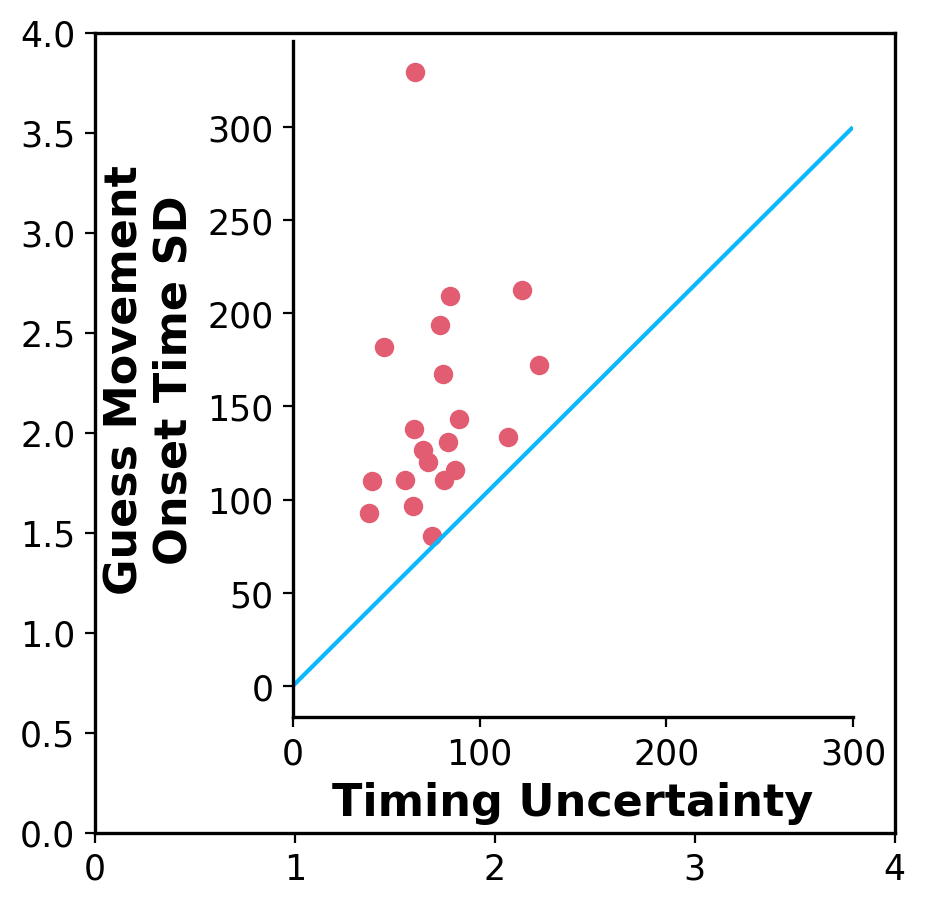

In [36]:
fig = pf.NewFigure("a", figsize = (4,4),dpi=200)
ax = fig.axes['a']
ax.scatter(timing_uncertainty, guess_sd_movement_onset_time, color = constants.xticklabel_colors_means[2])
xvals = np.arange(0,300)
ax.plot(xvals, xvals)

ax.set_xlabel("Timing Uncertainty")

ax.set_ylabel("Guess Movement\nOnset Time SD")

ax.set_xlim(0,300)